# <center>Estimativa do déficit habitacional: algoritmos baseados em árvores</center>

[INSERIR CONTEXTUALIZAÇÃO SOBRE A TAREFA DO DEFICIT HABITACIONAL]

[FALAR SOBRE A DIVISÃO DO DÉFICIT EM COMPONENTES]

[EXPLICAR PORQUE QUEREMOS USAR APRENDIZADO DE MÁQUINA, COMENTANDO SOBRE A QUESTÃO MACRO/MICRO DOS DADOS GERAIS DA AMOSTRA VS DADOS DO UNIVERSO]

## Algoritmos baseados em árvores

### Decision Tree: Árvore de Decisão

Algoritmo que toma decisões baseadas num diagrama de árvore. Os dados em subconjuntos menores com base em perguntas sobre os atributos das amostras. Cada divisão é feita de maneira a maximizar a separação dos dados em relação à variável-alvo. Esse modelo é fácil de interpretar e pode capturar relações complexas nos dados, mas tem a tendência de sofrer sobreajuste, especialmente se a árvore for muito profunda e não houver poda para limitar seu crescimento.

- Método baseado em uma estrutura hierárquica de decisões, semelhante a um diagrama de árvore;
- Divide os dados em subconjuntos baseando-se em perguntas (variáveis);
- Simples de interpretar, mas pode sofrer com sobreajuste se não for bem podado.

Esse algoritmo é implementado na biblioteca `sklearn` pelas classes `DecisionTreeClassifier` e `DecisionTreeRegressor`.

### Random Forest: Floresta Aleatória

O método de Floresta Aleatória consiste num método de aprendizado em conjunto (_ensemble_) que propõe um modelo composto por múltiplas árvores de decisão. Cada árvore é treinada usando uma amostra aleatória dos dados (_bootstrap_) e uma seleção aleatória de características, o que contribui para a diversidade dos modelos individuais. A previsão final é obtida pela média (para regressão) ou pela votação da maioria (para classificação) entre todas as árvores. Esse método reduz o risco de sobreajuste e melhora a generalização do modelo em comparação com uma única árvore de decisão.

- Conjunto (_ensemble_) de múltiplas árvores de decisão;
- Cada árvore é treinada com uma amostra diferente dos dados (bootstrap) e uma seleção aleatória de variáveis;
- Reduz sobreajuste e melhora a precisão em comparação com uma única árvore de decisão.

Esse algoritmo é implementado na biblioteca `sklearn` pelas classes `RandomForestClassifier` e `RandomForestRegressor`.

### Extra Tree: Árvore Extremamente Aleatória

Algoritmo semelhante à Floresta Aleatória, mas com uma diferença fundamental: em vez de procurar os melhores pontos de divisão em cada nó, a Extra Tree define as divisões de forma completamente aleatória dentro dos valores possíveis dos atributos. Isso torna o modelo mais rápido, pois evita cálculos custosos para encontrar a melhor divisão, ao custo de introduzir mais variabilidade nos resultados. Esse método pode funcionar bem em grandes conjuntos de dados e reduzir sobreajuste devido à sua aleatoriedade.

- Semelhante à Floresta Aleatória, mas as divisões dos nós são feitas de forma completamente aleatória, sem buscar o melhor limiar de corte;
- Mais rápido, pois evita o cálculo da melhor divisão;
- Pode ter maior variância, mas melhora a robustez em certos casos, como em conjuntos de dados com ruídos.

Esse algoritmo é implementado na biblioteca `sklearn` pelas classes `ExtraTreeClassifier` e `ExtraTreeRegressor`.

### Extra Trees: Árvores Extremamente Aleatórias

Assim como o método de Floresta Aleatória, o método de Árvores Extremamente Aleatórias trata-se de uma técnica de aprendizado em conjunto (_ensemble_), referindo-se ao uso um modelo composto por múltiplas Árvores Extremamente Aleatórias. Enquanto a Floresta Aleatória busca reduzir a variância ao treinar árvores diferentes com subconjuntos dos dados, as Extra Trees vão além, injetando ainda mais aleatoriedade ao escolher divisões aleatórias para cada nó. Isso pode resultar em um modelo mais rápido e menos propenso ao sobreajuste, mas em alguns casos, pode ser menos preciso do que uma Floresta Aleatória tradicional.

- Trata-se da versão de aprendizado em conjunto (_ensemble_) do método Extra Tree, ou seja, várias árvores extremamente aleatórias trabalhando juntas;
- Maior aleatoriedade na criação das árvores, além de redução da variância individual de cada árvore;
- Maior velocidade e menor tendência ao sobreajuste, mas pode ser menos preciso em alguns casos.

Esse algoritmo é implementado na biblioteca `sklearn` pelas classes `ExtraTreesClassifier` e `ExtraTreesRegressor`.

## Base de dados

In [1]:
## Base de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('./BD_SP_DEFICIT.xlsx')
data.head()

,Área de Ponderação,Cód. UF,UF,Cod_meso,Mesorregião,Cód. Microrregião,Microrregião,Cód_RM,Região Metropolitana,Cód. Município,...,DPP com moradia inadequada – Existe identificação do logradouro,DPP com moradia inadequada – Não existe identificação do logradouro,Moradia Adequada_V202eV203,Moradia Semi-Adequada_V204eV205,Moradia Inadequada_V206eV207,DOMICILIOS PRECARIOS,COABITACAO,ONUS EXCESSIVO,ADENSAMENTO,DEFICIT TOTAL
0,3500105003001,35,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,Municípios não pertencentes a estrutura de RM,3500105,...,0,0,3991,17,0,0,164,210,20,394
1,3500105003002,35,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,Municípios não pertencentes a estrutura de RM,3500105,...,0,0,6487,99,0,53,403,226,23,705
2,3500204001001,35,São Paulo,3501,São José do Rio Preto,35004,São José do Rio Preto,0,Municípios não pertencentes a estrutura de RM,3500204,...,0,0,1044,37,0,0,67,40,6,112
3,3500303003001,35,São Paulo,3507,Campinas,35029,Pirassununga,0,Municípios não pertencentes a estrutura de RM,3500303,...,2,2,8644,127,4,34,637,524,104,1300
4,3500402001001,35,São Paulo,3507,Campinas,35030,São João da Boa Vista,0,Municípios não pertencentes a estrutura de RM,3500402,...,0,10,2042,202,10,8,124,96,17,246


Uma breve análise do conjunto de dados nos permite verificar que múltiplas variáveis possuem valores iguais a zero. Vamos identificar quais são essas variáveis e sua porcentagem de valores iguais a zero: 

In [3]:
zero_counts = (data.iloc[:, 11:-5] == 0).sum() # Contagem de 0s por coluna
filtered_data = data.iloc[:, 11:-5].loc[:, zero_counts > 0] # Filtrando apenas colunas que possuem pelo menos um 0

percentage_zeros = round((filtered_data == 0).sum() / filtered_data.shape[0] * 100, 2).sort_values(ascending=False)
percentage_zeros.map(lambda x: f"{x:.2f}%")

DPP que não tinham banheiro ou sanitário – Existe esgoto a céu aberto                        86.10%
DPP que não tinham banheiro ou sanitário – Não existe iluminação pública                     84.61%
DPP que não tinham banheiro ou sanitário – Existe lixo acumulado nos logradouros             83.92%
DPP com lixo jogado em rio, lago ou mar                                                      82.53%
DPP que não tinham banheiro ou sanitário – Não existe pavimentação                           75.99%
DPP que não tinham banheiro ou sanitário – Não existe meio-fio/guia                          72.31%
DPP com moradia inadequada –  Existe identificação do logradouro                             71.14%
DPP com lixo enterrado na propriedade                                                        68.96%
DPP que não tinham banheiro ou sanitário – Não existe arborização                            67.84%
DPP com moradia inadequada – Não existe identificação do logradouro                          66.03%


Algoritmos baseados em árvores não exigem normalização dos dados, pois considera apenas valores absolutos no processo de ramificação. Contudo, para que seja mais fácil visualizar, interpretar e comparar os modelos analisados, a técnica de normalização Min-max será usada para escalar as variáveis no intervalo de 0 a 1.

Essa técnica é implementada pelo módulo `MinMaxScaler` do sklearn:

In [4]:
from sklearn.preprocessing import MinMaxScaler

cols_to_normalize = data.columns[11:]

scaler_norm = MinMaxScaler()
data[cols_to_normalize] = scaler_norm.fit_transform(data[cols_to_normalize])

Agora definiremos nosso conjunto de variáveis independentes e variáveis de interesse:

In [5]:
X = data.iloc[:, 11:-5]  
y = data.iloc[:, -5:].to_dict(orient='series')
y.keys()

dict_keys(['DOMICILIOS PRECARIOS', 'COABITACAO', 'ONUS EXCESSIVO', 'ADENSAMENTO', 'DEFICIT TOTAL'])

## Metodologia

Os quatro métodos de aprendizado de máquina baseados em árvore apresentados anteriormente serão usados na tarefa de regressão da estimativa do déficit habitacional. Essa estimativa será calculada para cada um dos quatro componentes do déficit habitacional no Brasil: domicílios precários, coabitação, ônus excessivo e adensamento. Portanto, para cada método analisado, serão criados quatro modelos individuais, um para cada componente.

As métricas usadas para avaliar os modelos são:
- **R-quadrado (R-squared - R²):** representa o percentual da variância dos dados que é explicada pelo modelo, variando de 0 a 1 (ou podendo ser negativo se o modelo for pior que uma média simples). Quanto mais próximo de 1, mais explicativo é o modelo em relação aos dados previstos.
- **Raiz Do Erro Quadrático Médio (Root Mean Squared Error - RMSE):** representa a raiz do erro quadrático médio Mean Squared Error - RMSE), penalizando mais erros grandes, o que o torna útil quando erros extremos são críticos.
- **Erro Médio Absoluto (Mean Absolute Error - MAE):** calcula a média dos erros absolutos sem elevar ao quadrado, sendo uma métrica mais intuitiva e menos sensível a outliers. Enquanto o RMSE destaca grandes erros, o MAE dá uma visão geral mais equilibrada do desempenho do modelo.

A métrica **R-quadrado** será utilizada na seleção de modelos.

O protocolo experimental usado é representado pelas seguintes etapas:
1. Uso da validação cruzada aninhada para analisar de forma robusta o processo de modelagem, através da seleção de modelos e subsequente avaliação;
2. Treinamento do modelo final através da validação cruzada comum, com ajuste de hiperparâmetros por meio do `RandomizedSearchCV` e separação de uma partição de dados para teste;
3. Criação de gráficos;
4. Exportação das métricas calculadas em um arquivo Excel.

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import make_scorer, root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import randint, uniform

Abaixo, um dicionário com as três métricas de interesse é criado, para que possam ser consideradas durante o processo de validação cruzada dos métodos avaliados:

In [7]:
scorers = {
    'r2': 'r2',
    'rmse': make_scorer(root_mean_squared_error),
    'mae': make_scorer(mean_absolute_error)
}

### Validação Cruzada Aninhada (Nested Cross-Validation)

In [8]:
def execute_nested_cv(X, y, model, n_splits_outer, n_splits_inner, params, seed=None):
    cv_outer = KFold(n_splits=n_splits_outer, shuffle=True, random_state=seed)
    
    outer_results = {
        'r2': [],
        'rmse': [],
        'mae': [],
    }
    for fold, (train_idx, test_idx) in enumerate(cv_outer.split(X), 1):
        print(f'Fold {fold}:')
    
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx] # validação
    
        cv_inner = KFold(n_splits=n_splits_inner, shuffle=True, random_state=seed)
        
        # Define and execute hyperparameter tuning
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=params,
            n_iter=60,
            cv=cv_inner,
            scoring=scorers, refit='r2',
            n_jobs=-1, random_state=seed
        )

        result = random_search.fit(X_train, y_train)
        
        # Get the best performing model fit on the whole training set
        best_model = result.best_estimator_
        
        # Evaluate model on the current fold test set 
        y_pred = best_model.predict(X_test)
        
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        outer_results['r2'].append(r2)
        outer_results['rmse'].append(rmse)
        outer_results['mae'].append(mae)
        
        print(f'\nR²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}')
        print(f'Estimated R²: {result.best_score_:.3f}')
        print(f'params={result.best_params_}\n')
    
    # Summarize the estimated performance of the model
    #print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))
    
    # Summarize the estimated performance of the model
    mean_r2 = np.mean(outer_results['r2'])
    std_r2 = np.std(outer_results['r2'])
    print(f'Average R²: {np.mean(outer_results['r2']):.3f}, std: (± {np.std(outer_results['r2']):.3f})')
    print(f'Average RMSE: {np.mean(outer_results['rmse']):.3f}, std: (± {np.std(outer_results['rmse']):.3f})')
    print(f'Average MAE: {np.mean(outer_results['mae']):.3f}, std: (± {np.std(outer_results['mae']):.3f})')

    return outer_results.copy()

### Validação Cruzada (Cross-Validation)

In [9]:
def execute_cv(model, X, y, n_splits, n_iter, params, scoring, refit='r2', seed=None):    
    random_search = RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=n_iter,
        scoring=scoring,
        refit=refit,
        cv=n_splits,
        random_state=seed,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit RandomizedSearchCV
    random_search.fit(X, y)
    
    # Get Best Parameters
    best_params = random_search.best_params_
    print("Best parameters:", best_params)
    return best_params

In [10]:
def evaluate_model(model, X, y):
    y_pred = best_dt.predict(X_test)
    
    # Compute Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print Metrics
    print(f"R-squared: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    return y_pred

### Criação de gráficos

#### Valores verdadeiros vs preditos (teste)

In [11]:
def create_test_plot(y_test, y_pred, model_name="", component_name=""):
    # Plotting actual vs predicted values for test data
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction Line')
    plt.title(f'{model_name}: Actual vs Predicted - {component_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

In [12]:
# def plot_feature_importances(model, X, n_var=10, model_name="", component_name=""):

#     # Compute feature importances
#     importances = model.feature_importances_
#     feature_names = X.columns  # Get actual feature names if X is a Pandas DataFrame
    
#     # Get indices of top 10 most important features
#     indices = np.argsort(importances)[-n_var:]
    
#     # Sort indices by importance in descending order
#     sorted_indices = indices[np.argsort(importances[indices])]
    
#     # Plot the top 10 features
#     plt.figure(figsize=(10, 7))
#     plt.title(f"Top {n_var} Feature Importances: {model_name} - {component_name}")
#     plt.barh(range(n_var), importances[sorted_indices], align="center")
#     plt.yticks(range(n_var), feature_names[sorted_indices])  # Use actual feature names
#     plt.xlabel("Importance Score")
#     plt.show()

In [13]:
def plot_feature_importances(model, X, n_var=10, model_name="", component_name=""):
    """
    Plots the top n_var most important features of a tree-based model.
    Displays importance values next to each bar.

    Parameters:
    - model: Trained tree-based model with feature_importances_ attribute.
    - X: DataFrame containing feature names.
    - n_var: Number of top features to display.
    """

    # Compute feature importances
    importances = model.feature_importances_
    feature_names = np.array(X.columns)  # Get actual feature names
    
    # Get indices of top n_var most important features
    indices = np.argsort(importances)[-n_var:]
    
    # Sort indices by importance in descending order
    sorted_indices = indices[np.argsort(importances[indices])]

    # Plot the top n_var features
    plt.figure(figsize=(10, 8))
    plt.title(f"Top {n_var} Feature Importances: {model_name} - {component_name}")
    bars = plt.barh(range(n_var), importances[sorted_indices], align="center", color='skyblue')

    # Use actual feature names
    plt.yticks(range(n_var), feature_names[sorted_indices])
    plt.xlabel("Importance Score")

    # Add importance values as text next to bars
    for bar, value in zip(bars, importances[sorted_indices]):
        plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
                 f"{value:.2f}", va="center", fontsize=9)
    plt.show()

### Exportação de resultados (precisa refatorar!)

In [14]:
# def create_series(data, name):
#     df = pd.DataFrame(data)

#     # Calculate the mean of each column
#     means = df.mean()  # This step calculates the means for each column
    
#     # Create a Series with the index 'PRECARIO'
#     means_series = pd.Series(means, name=name)

#     return means_series

In [15]:
# s1 = create_series(metrics_domic_prec, 'DOMICILIOS PRECARIOS')
# s2 = create_series(metrics_coabitacao, 'COABITACAO')
# s3 = create_series(metrics_onus, 'ONUS EXCESSIVO')
# s4 = create_series(metrics_adensamento, 'ADENSAMENTO')

In [16]:
# extra_tree_df = pd.concat([s1, s2, s3, s4], axis=1).T

In [17]:
# with pd.ExcelWriter('resultados_algoritmos_arvores.xlsx') as writer:  
#     decision_tree_df.to_excel(writer, sheet_name='DecisionTreeRegressor')
#     extra_tree_df.to_excel(writer, sheet_name='ExtraTreeRegressor')

## Treinamento dos modelos

### DecisionTreeRegressor

In [18]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': randint(1, 15),
    'min_samples_split': randint(15, 50),
    'min_samples_leaf': randint(5, 30),
    'min_impurity_decrease': uniform(0.001, 0.010),
    'max_features': [None, 'sqrt', 'log2'],
}

#### Domicílios precários

In [19]:
domic = execute_nested_cv(X, y['DOMICILIOS PRECARIOS'], DecisionTreeRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.434, RMSE: 0.052, MAE: 0.020
Estimated R²: 0.209
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}

Fold 2:

R²: 0.242, RMSE: 0.035, MAE: 0.020
Estimated R²: 0.251
params={'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'sqrt', 'min_impurity_decrease': np.float64(0.00812270589924442), 'min_samples_leaf': 9, 'min_samples_split': 31}

Fold 3:

R²: 0.456, RMSE: 0.052, MAE: 0.025
Estimated R²: 0.163
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}

Fold 4:

R²: 0.247, RMSE: 0.037, MAE: 0.019
Estimated R²: 0.299
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}

Fold 5:


In [20]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['DOMICILIOS PRECARIOS'], test_size=0.2, random_state=42)

best_params = execute_cv(
    DecisionTreeRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 'sqrt', 'min_impurity_decrease': np.float64(0.002818249672071006), 'min_samples_leaf': 25, 'min_samples_split': 47}


In [21]:
# Refit Model with Best Parameters
best_dt = DecisionTreeRegressor(**best_params, random_state=42)
best_dt.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_dt, X_test, y_test)

R-squared: 0.1859
RMSE: 0.0513
MAE: 0.0232


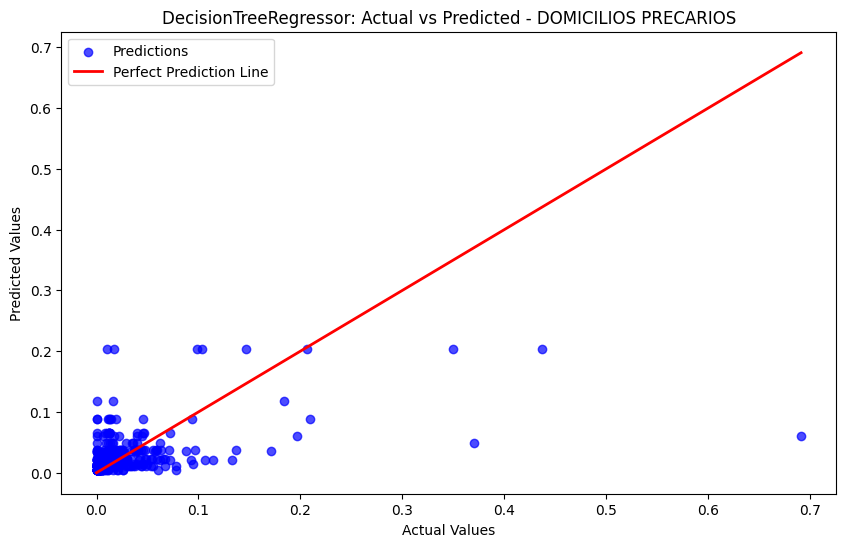

In [22]:
create_test_plot(y_test, y_pred, model_name='DecisionTreeRegressor', component_name='DOMICILIOS PRECARIOS')

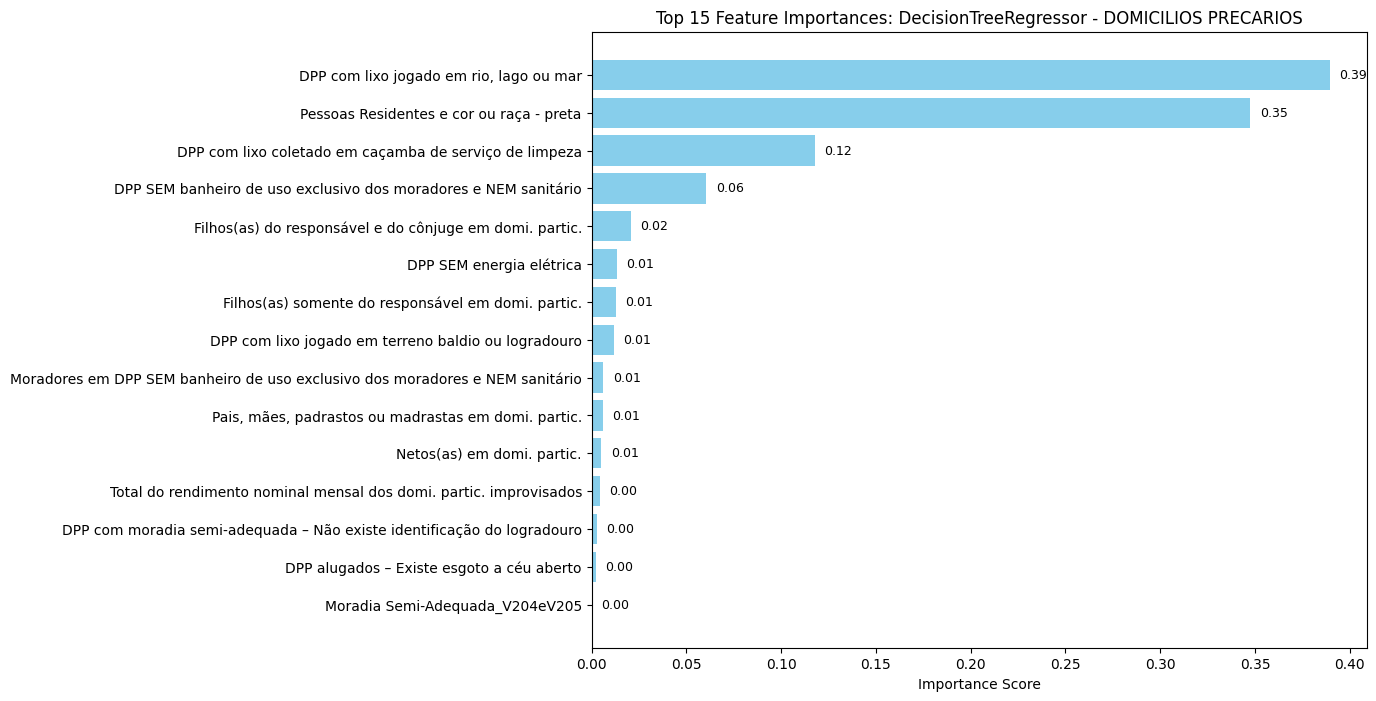

In [23]:
plot_feature_importances(best_dt, X, n_var=15, model_name='DecisionTreeRegressor', component_name='DOMICILIOS PRECARIOS')

#### Coabitação

In [24]:
coab = execute_nested_cv(X, y['COABITACAO'], DecisionTreeRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.888, RMSE: 0.033, MAE: 0.020
Estimated R²: 0.892
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005867421529594552), 'min_samples_leaf': 12, 'min_samples_split': 41}

Fold 2:

R²: 0.876, RMSE: 0.032, MAE: 0.018
Estimated R²: 0.890
params={'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.009607305832563435), 'min_samples_leaf': 11, 'min_samples_split': 20}

Fold 3:

R²: 0.772, RMSE: 0.058, MAE: 0.023
Estimated R²: 0.917
params={'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.009607305832563435), 'min_samples_leaf': 11, 'min_samples_split': 20}

Fold 4:

R²: 0.904, RMSE: 0.021, MAE: 0.015
Estimated R²: 0.903
params={'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.009607305832563435), 'min_samples_leaf': 11, 'min_samples_split': 20}

Fold 5:


In [25]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['COABITACAO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    DecisionTreeRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.009607305832563435), 'min_samples_leaf': 11, 'min_samples_split': 20}


In [26]:
# Refit Model with Best Parameters
best_dt = DecisionTreeRegressor(**best_params, random_state=42)
best_dt.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_dt, X_test, y_test)

R-squared: 0.9232
RMSE: 0.0264
MAE: 0.0175


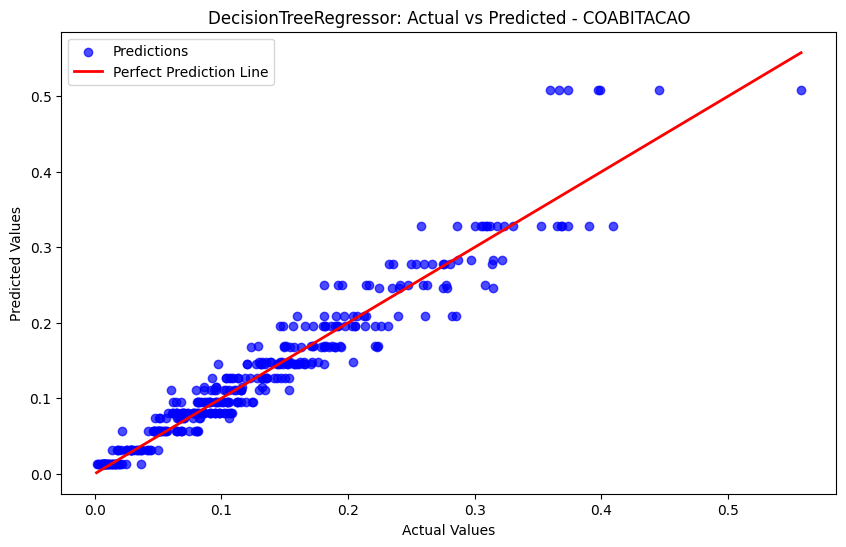

In [27]:
create_test_plot(y_test, y_pred, model_name='DecisionTreeRegressor', component_name='COABITACAO')

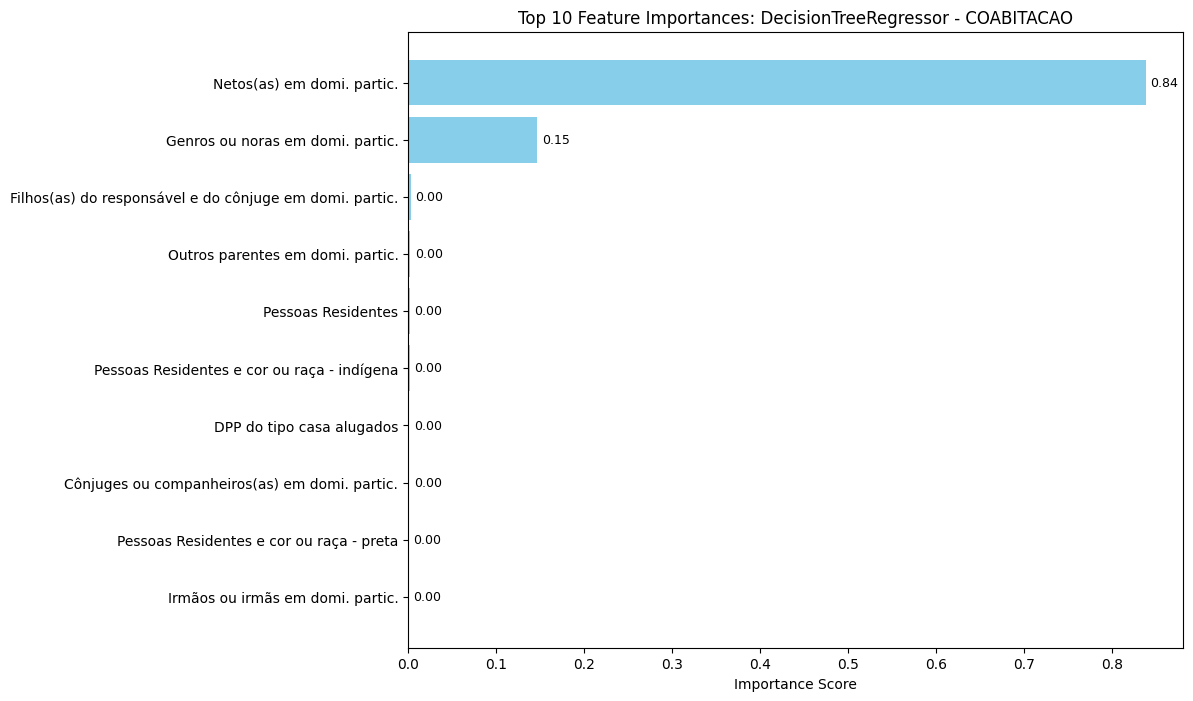

In [28]:
plot_feature_importances(best_dt, X, n_var=10, model_name='DecisionTreeRegressor', component_name='COABITACAO')

#### Ônus excessivo

In [29]:
onus = execute_nested_cv(X, y['ONUS EXCESSIVO'], DecisionTreeRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.887, RMSE: 0.047, MAE: 0.034
Estimated R²: 0.816
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005867421529594552), 'min_samples_leaf': 12, 'min_samples_split': 41}

Fold 2:

R²: 0.816, RMSE: 0.049, MAE: 0.033
Estimated R²: 0.814
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}

Fold 3:

R²: 0.808, RMSE: 0.063, MAE: 0.040
Estimated R²: 0.825
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005867421529594552), 'min_samples_leaf': 12, 'min_samples_split': 41}

Fold 4:

R²: 0.801, RMSE: 0.048, MAE: 0.032
Estimated R²: 0.824
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}

Fold 5:


In [30]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['ONUS EXCESSIVO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    DecisionTreeRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}


In [31]:
# Refit Model with Best Parameters
best_dt = DecisionTreeRegressor(**best_params, random_state=42)
best_dt.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_dt, X_test, y_test)

R-squared: 0.8275
RMSE: 0.0532
MAE: 0.0365


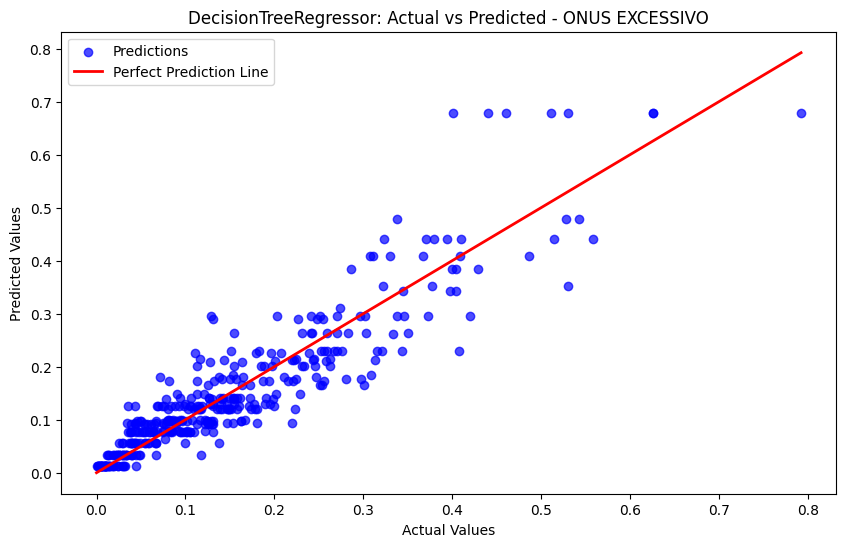

In [32]:
create_test_plot(y_test, y_pred, model_name='DecisionTreeRegressor', component_name='ONUS EXCESSIVO')

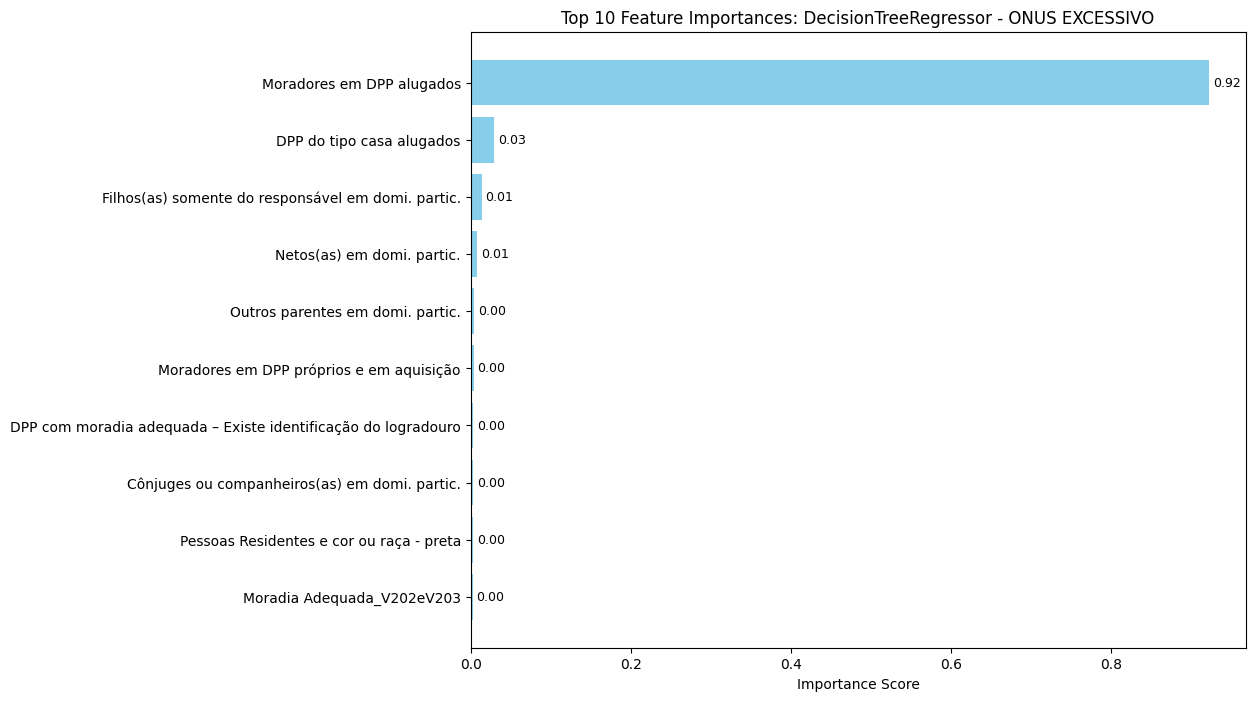

In [33]:
plot_feature_importances(best_dt, X, n_var=10, model_name='DecisionTreeRegressor', component_name='ONUS EXCESSIVO')

#### Adensamento

In [34]:
adens = execute_nested_cv(X, y['ADENSAMENTO'], DecisionTreeRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.760, RMSE: 0.093, MAE: 0.064
Estimated R²: 0.668
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}

Fold 2:

R²: 0.721, RMSE: 0.098, MAE: 0.060
Estimated R²: 0.687
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}

Fold 3:

R²: 0.725, RMSE: 0.094, MAE: 0.060
Estimated R²: 0.688
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}

Fold 4:

R²: 0.714, RMSE: 0.082, MAE: 0.055
Estimated R²: 0.685
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005867421529594552), 'min_samples_leaf': 12, 'min_samples_split': 41}

Fold 5:


In [35]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['ADENSAMENTO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    DecisionTreeRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}


In [37]:
# Refit Model with Best Parameters
best_dt = DecisionTreeRegressor(**best_params, random_state=42)
best_dt.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_dt, X_test, y_test)

R-squared: 0.7401
RMSE: 0.0956
MAE: 0.0612


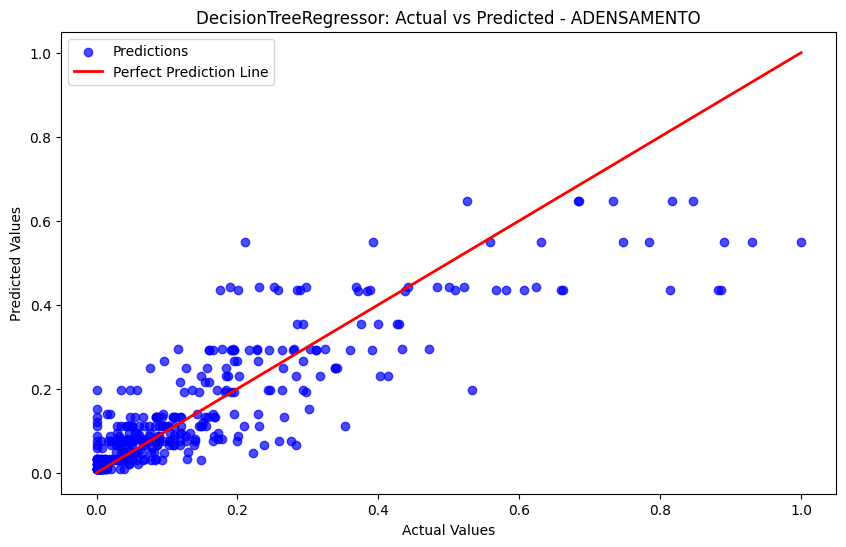

In [38]:
create_test_plot(y_test, y_pred, model_name='DecisionTreeRegressor', component_name='ADENSAMENTO')

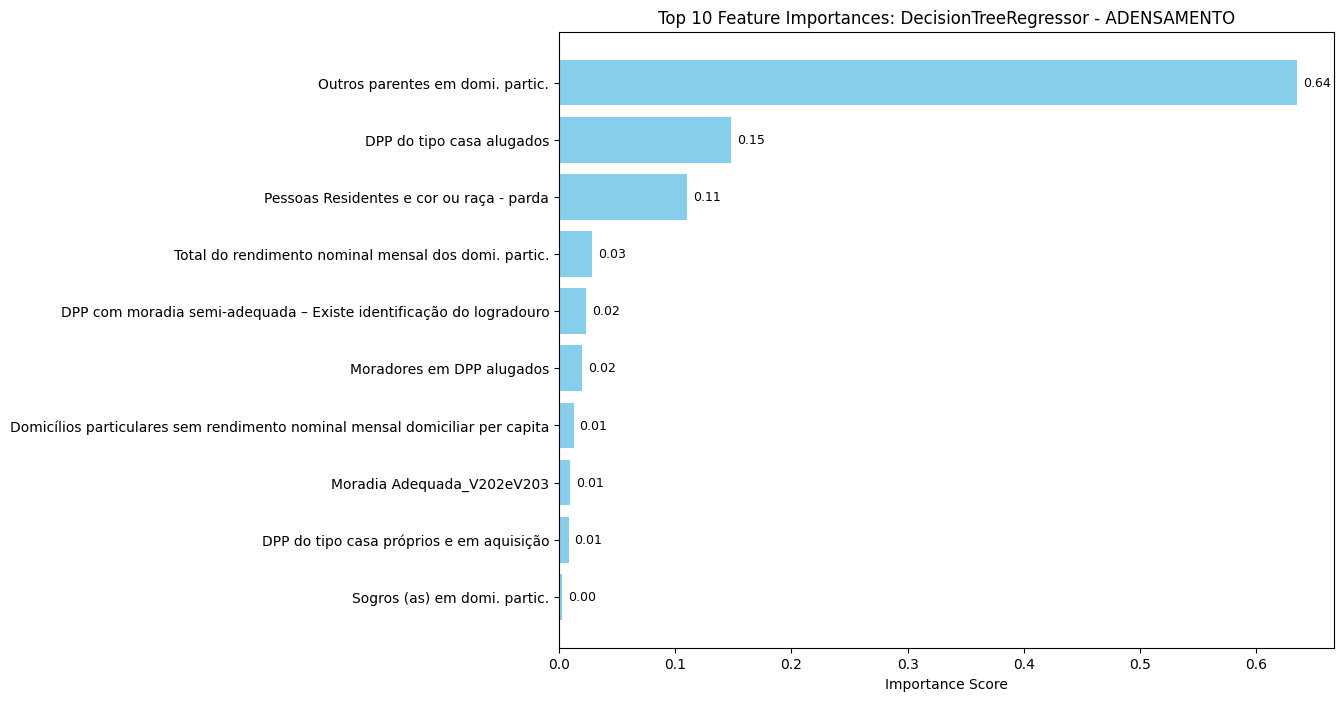

In [39]:
plot_feature_importances(best_dt, X, n_var=10, model_name='DecisionTreeRegressor', component_name='ADENSAMENTO')

### ExtraTreeRegressor

In [40]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': randint(1, 15),
    'min_samples_split': randint(15, 50),
    'min_samples_leaf': randint(5, 30),
    'min_impurity_decrease': uniform(0.001, 0.010),
    'max_features': [None, 'sqrt', 'log2'],
}

#### Domicílios precários

In [41]:
domic = execute_nested_cv(X, y['DOMICILIOS PRECARIOS'], ExtraTreeRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.355, RMSE: 0.056, MAE: 0.024
Estimated R²: 0.260
params={'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}

Fold 2:

R²: 0.010, RMSE: 0.040, MAE: 0.020
Estimated R²: 0.282
params={'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}

Fold 3:

R²: 0.413, RMSE: 0.054, MAE: 0.024
Estimated R²: 0.144
params={'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}

Fold 4:

R²: 0.148, RMSE: 0.039, MAE: 0.020
Estimated R²: 0.273
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005867421529594552), 'min_samples_leaf': 12, 'min_samples_split': 41}

Fold 5:


In [42]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['DOMICILIOS PRECARIOS'], test_size=0.2, random_state=42)

best_params = execute_cv(
    ExtraTreeRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005867421529594552), 'min_samples_leaf': 12, 'min_samples_split': 41}


In [43]:
# Refit Model with Best Parameters
best_et = ExtraTreeRegressor(**best_params, random_state=42)
best_et.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_et, X_test, y_test)

R-squared: -10.8653
RMSE: 0.1958
MAE: 0.1336


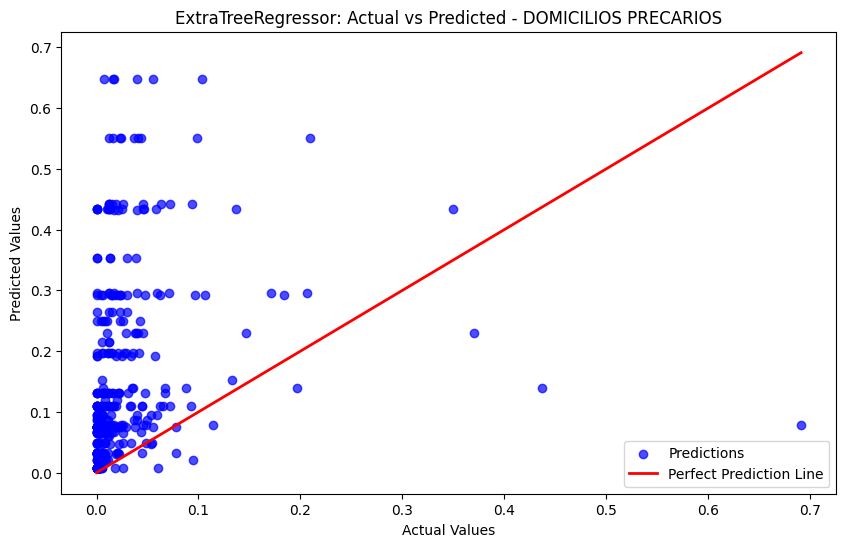

In [44]:
create_test_plot(y_test, y_pred, model_name='ExtraTreeRegressor', component_name='DOMICILIOS PRECARIOS')

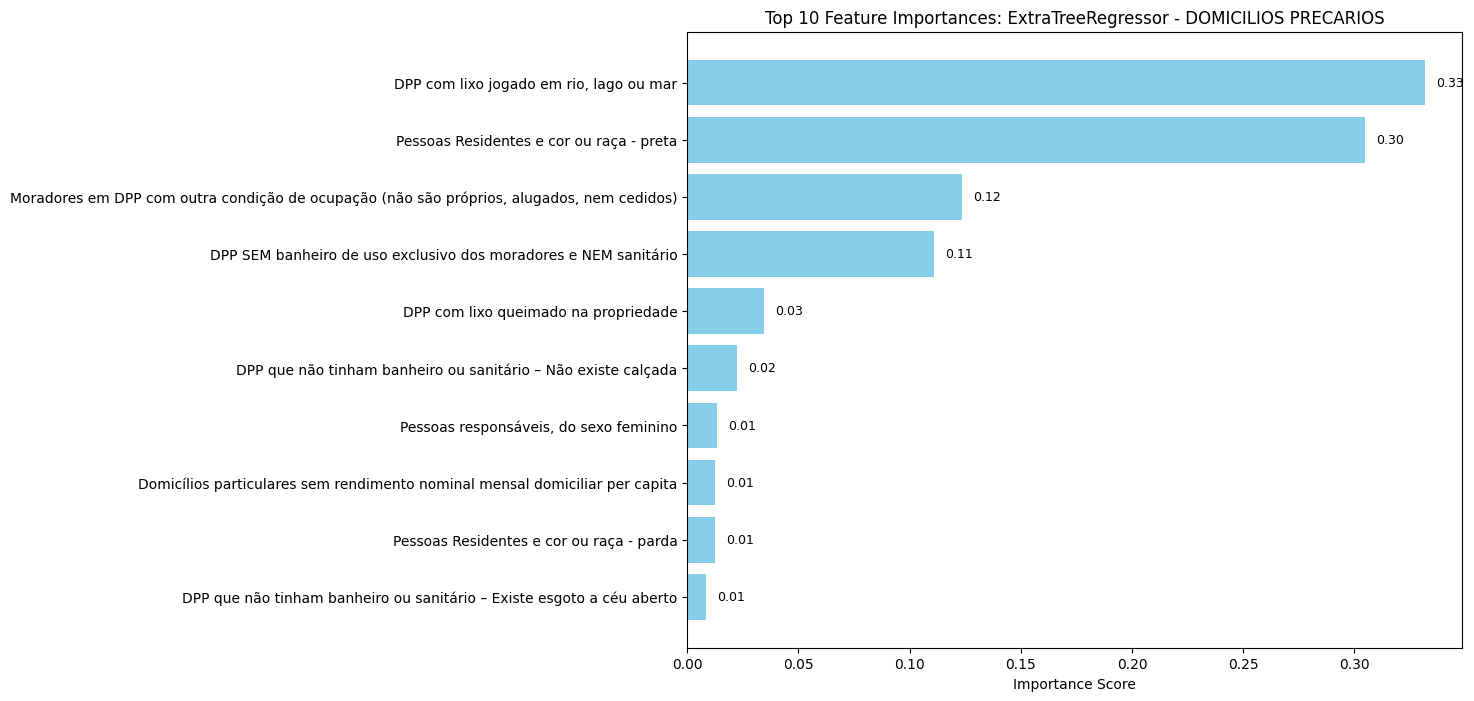

In [45]:
plot_feature_importances(best_et, X, n_var=10, model_name='ExtraTreeRegressor', component_name='DOMICILIOS PRECARIOS')

#### Coabitação

In [46]:
coab = execute_nested_cv(X, y['COABITACAO'], ExtraTreeRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.929, RMSE: 0.026, MAE: 0.019
Estimated R²: 0.884
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005867421529594552), 'min_samples_leaf': 12, 'min_samples_split': 41}

Fold 2:

R²: 0.880, RMSE: 0.031, MAE: 0.020
Estimated R²: 0.867
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005867421529594552), 'min_samples_leaf': 12, 'min_samples_split': 41}

Fold 3:

R²: 0.739, RMSE: 0.062, MAE: 0.024
Estimated R²: 0.907
params={'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}

Fold 4:

R²: 0.872, RMSE: 0.025, MAE: 0.018
Estimated R²: 0.881
params={'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}

Fold 5:


In [47]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['COABITACAO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    ExtraTreeRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}


In [48]:
# Refit Model with Best Parameters
best_et = ExtraTreeRegressor(**best_params, random_state=42)
best_et.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_et, X_test, y_test)

R-squared: 0.0904
RMSE: 0.0908
MAE: 0.0574


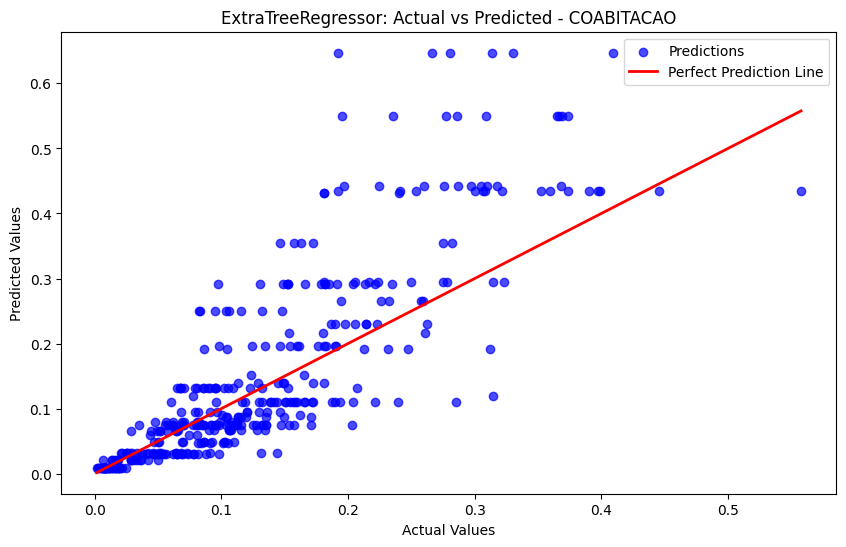

In [49]:
create_test_plot(y_test, y_pred, model_name='ExtraTreeRegressor', component_name='COABITACAO')

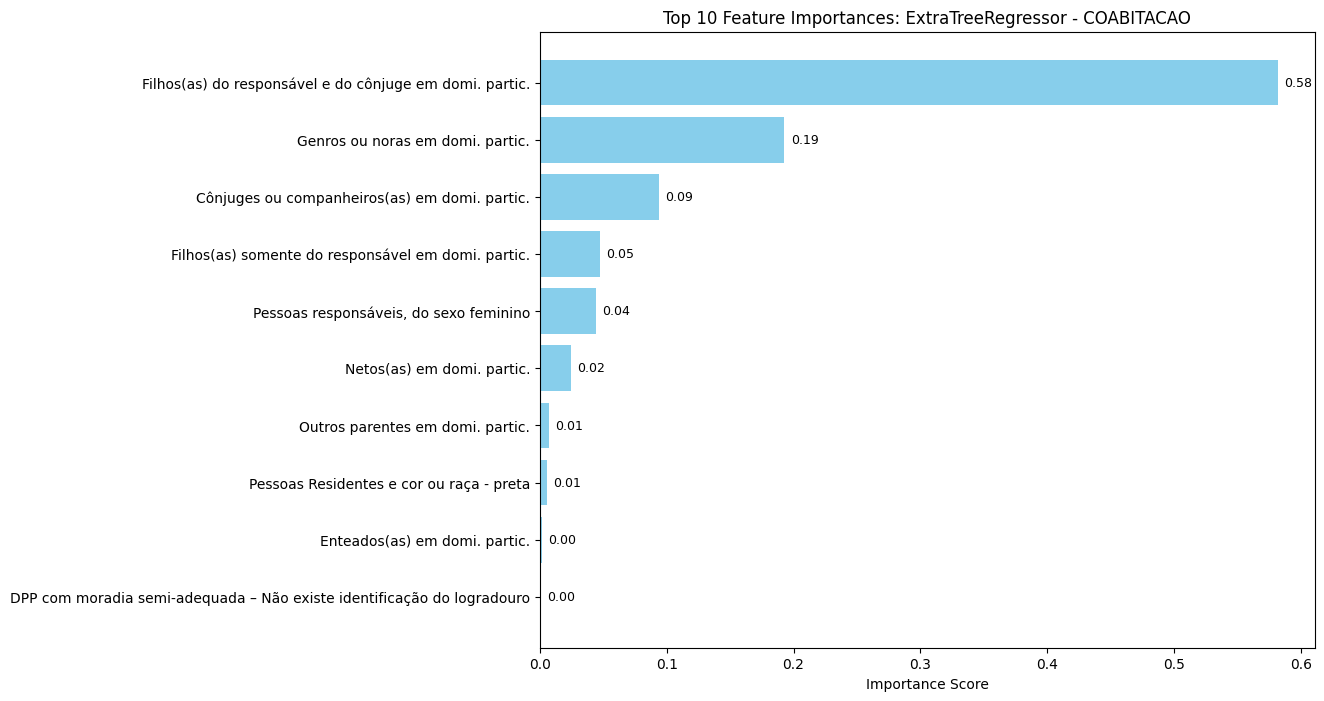

In [50]:
plot_feature_importances(best_et, X, n_var=10, model_name='ExtraTreeRegressor', component_name='COABITACAO')

#### Ônus excessivo

In [51]:
onus = execute_nested_cv(X, y['ONUS EXCESSIVO'], ExtraTreeRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.849, RMSE: 0.054, MAE: 0.039
Estimated R²: 0.767
params={'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.009607305832563435), 'min_samples_leaf': 11, 'min_samples_split': 20}

Fold 2:

R²: 0.830, RMSE: 0.047, MAE: 0.031
Estimated R²: 0.781
params={'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}

Fold 3:

R²: 0.617, RMSE: 0.089, MAE: 0.047
Estimated R²: 0.785
params={'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}

Fold 4:

R²: 0.791, RMSE: 0.049, MAE: 0.035
Estimated R²: 0.783
params={'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.009607305832563435), 'min_samples_leaf': 11, 'min_samples_split': 20}

Fold 5:


In [52]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['ONUS EXCESSIVO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    ExtraTreeRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}


In [53]:
# Refit Model with Best Parameters
best_et = ExtraTreeRegressor(**best_params, random_state=42)
best_et.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_et, X_test, y_test)

R-squared: 0.5645
RMSE: 0.0846
MAE: 0.0578


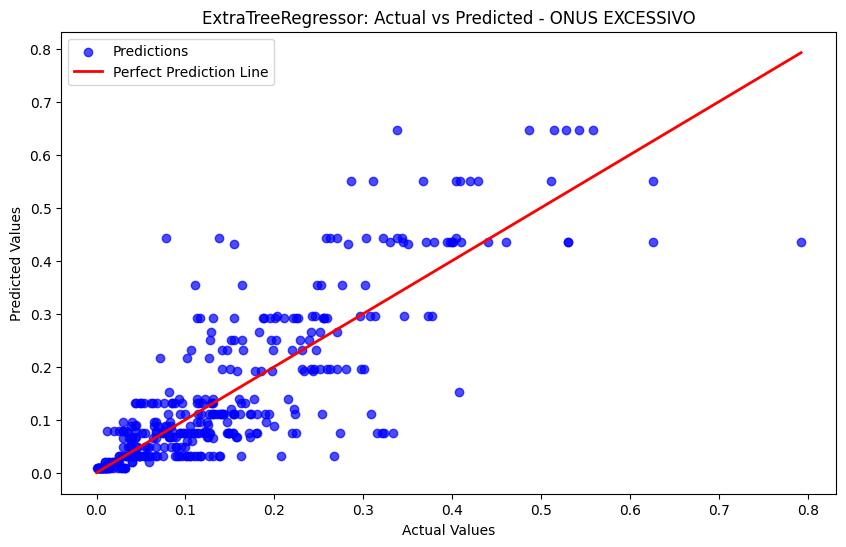

In [54]:
create_test_plot(y_test, y_pred, model_name='ExtraTreeRegressor', component_name='ONUS EXCESSIVO')

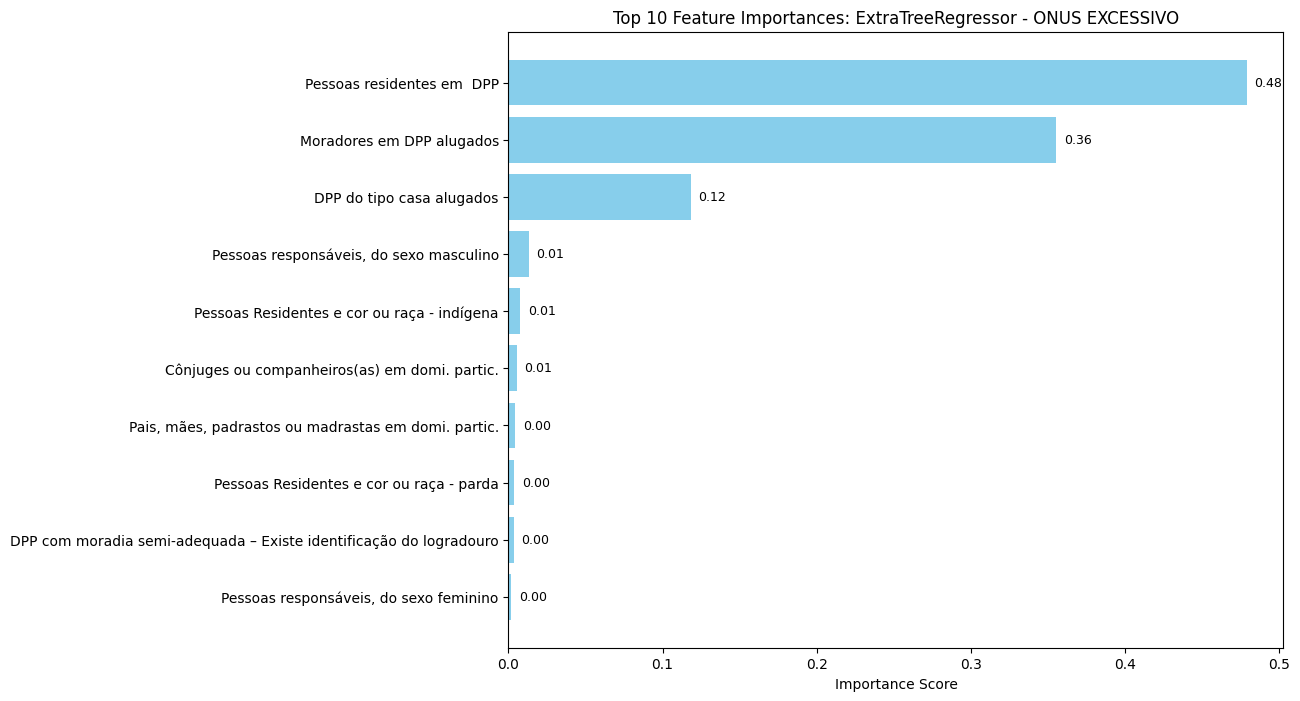

In [55]:
plot_feature_importances(best_et, X, n_var=10, model_name='ExtraTreeRegressor', component_name='ONUS EXCESSIVO')

#### Adensamento

In [56]:
adens = execute_nested_cv(X, y['ADENSAMENTO'], ExtraTreeRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.634, RMSE: 0.115, MAE: 0.071
Estimated R²: 0.677
params={'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}

Fold 2:

R²: 0.773, RMSE: 0.088, MAE: 0.061
Estimated R²: 0.664
params={'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005867421529594552), 'min_samples_leaf': 12, 'min_samples_split': 41}

Fold 3:

R²: 0.721, RMSE: 0.094, MAE: 0.062
Estimated R²: 0.690
params={'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.009607305832563435), 'min_samples_leaf': 11, 'min_samples_split': 20}

Fold 4:

R²: 0.569, RMSE: 0.101, MAE: 0.067
Estimated R²: 0.684
params={'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.009607305832563435), 'min_samples_leaf': 11, 'min_samples_split': 20}

Fold 5:


In [57]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['ADENSAMENTO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    ExtraTreeRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'min_impurity_decrease': np.float64(0.008296061783380642), 'min_samples_leaf': 12, 'min_samples_split': 36}


In [58]:
# Refit Model with Best Parameters
best_et = ExtraTreeRegressor(**best_params, random_state=42)
best_et.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_et, X_test, y_test)

R-squared: 0.7401
RMSE: 0.0956
MAE: 0.0612


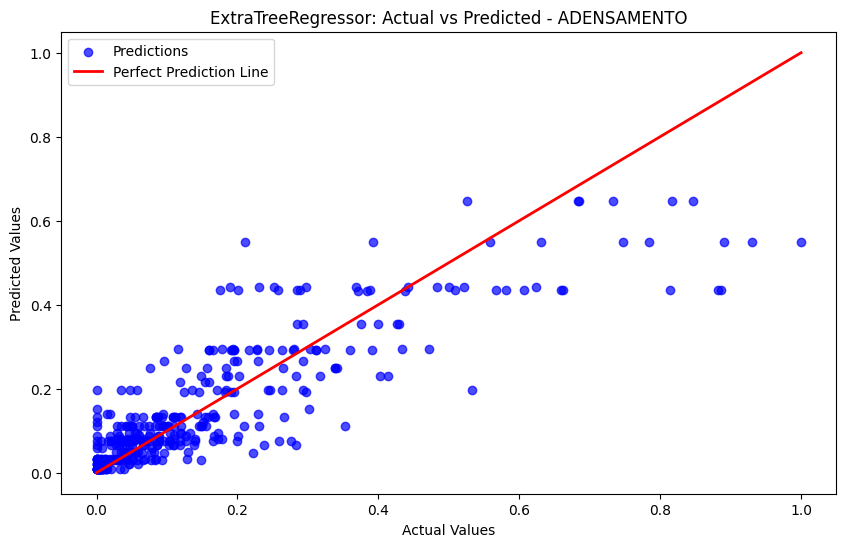

In [59]:
create_test_plot(y_test, y_pred, model_name='ExtraTreeRegressor', component_name='ADENSAMENTO')

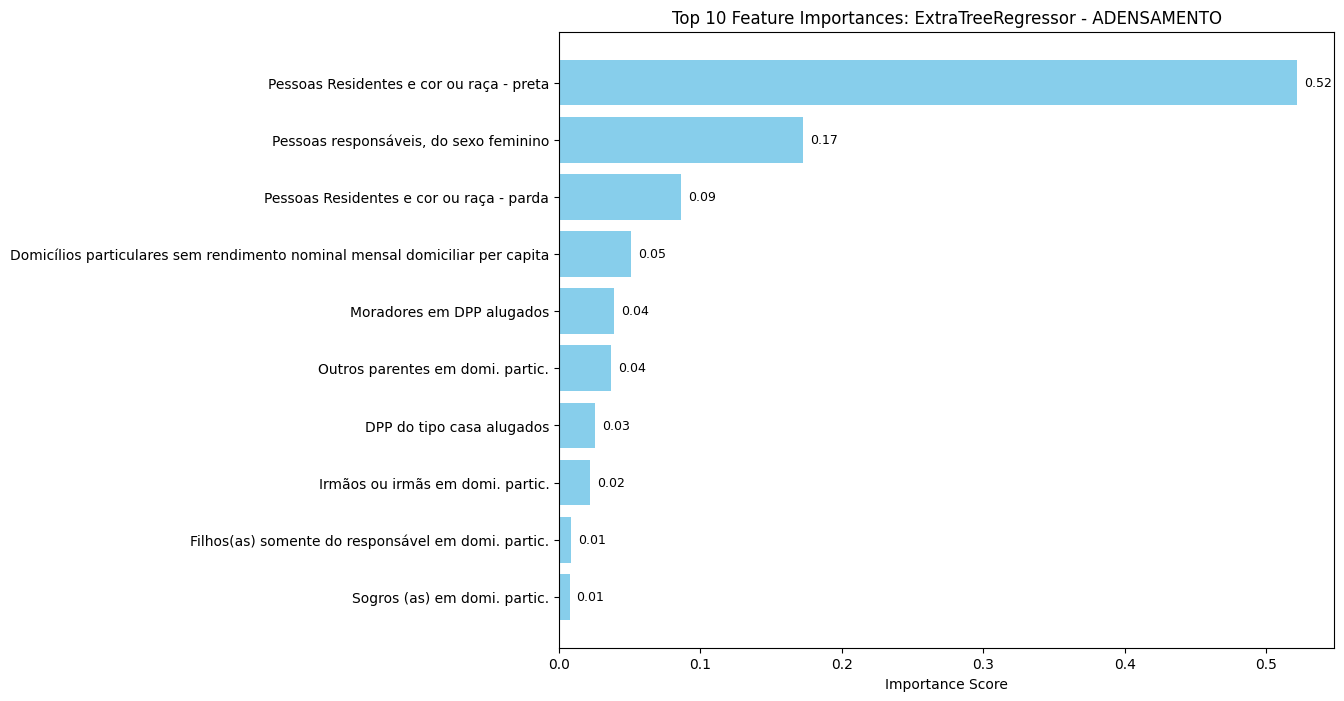

In [60]:
plot_feature_importances(best_et, X, n_var=10, model_name='ExtraTreeRegressor', component_name='ADENSAMENTO')

### RandomForestRegressor

In [63]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': randint(1, 15),
    'min_samples_split': randint(15, 50),
    'min_samples_leaf': randint(5, 30),
    'min_impurity_decrease': uniform(0.001, 0.010),
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

#### Domicílios precários

In [64]:
domic = execute_nested_cv(X, y['DOMICILIOS PRECARIOS'], RandomForestRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.483, RMSE: 0.050, MAE: 0.020
Estimated R²: 0.330
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 2:

R²: 0.357, RMSE: 0.032, MAE: 0.019
Estimated R²: 0.347
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 3:

R²: 0.369, RMSE: 0.056, MAE: 0.025
Estimated R²: 0.288
params={'bootstrap': False, 'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'sqrt', 'min_impurity_decrease': np.float64(0.010266588657937944), 'min_samples_leaf': 20, 'min_samples_split': 29}

Fold 4:

R²: 0.298, RMSE: 0.035, MAE: 0.019
Estimated R²: 0.348
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64

In [65]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['DOMICILIOS PRECARIOS'], test_size=0.2, random_state=42)

best_params = execute_cv(
    RandomForestRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}


In [66]:
# Refit Model with Best Parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_rf, X_test, y_test)

R-squared: -10.8653
RMSE: 0.1958
MAE: 0.1336


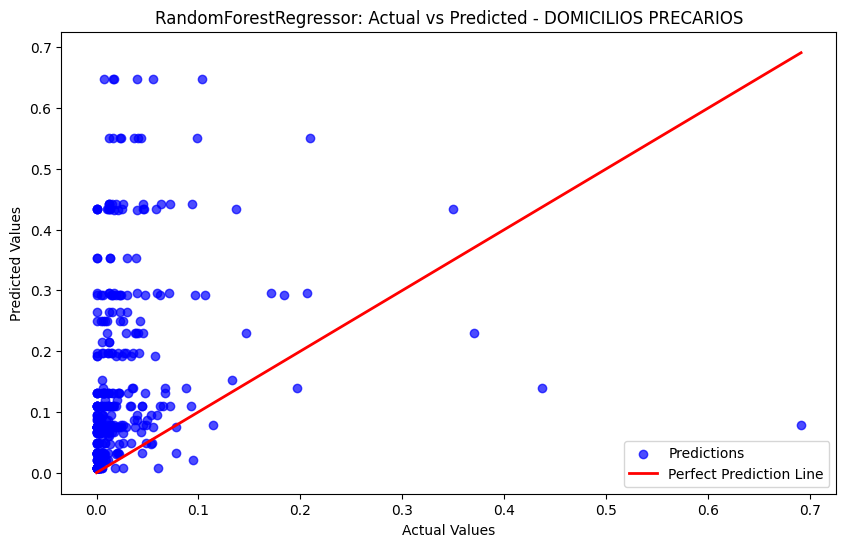

In [67]:
create_test_plot(y_test, y_pred, model_name='RandomForestRegressor', component_name='DOMICILIOS PRECARIOS')

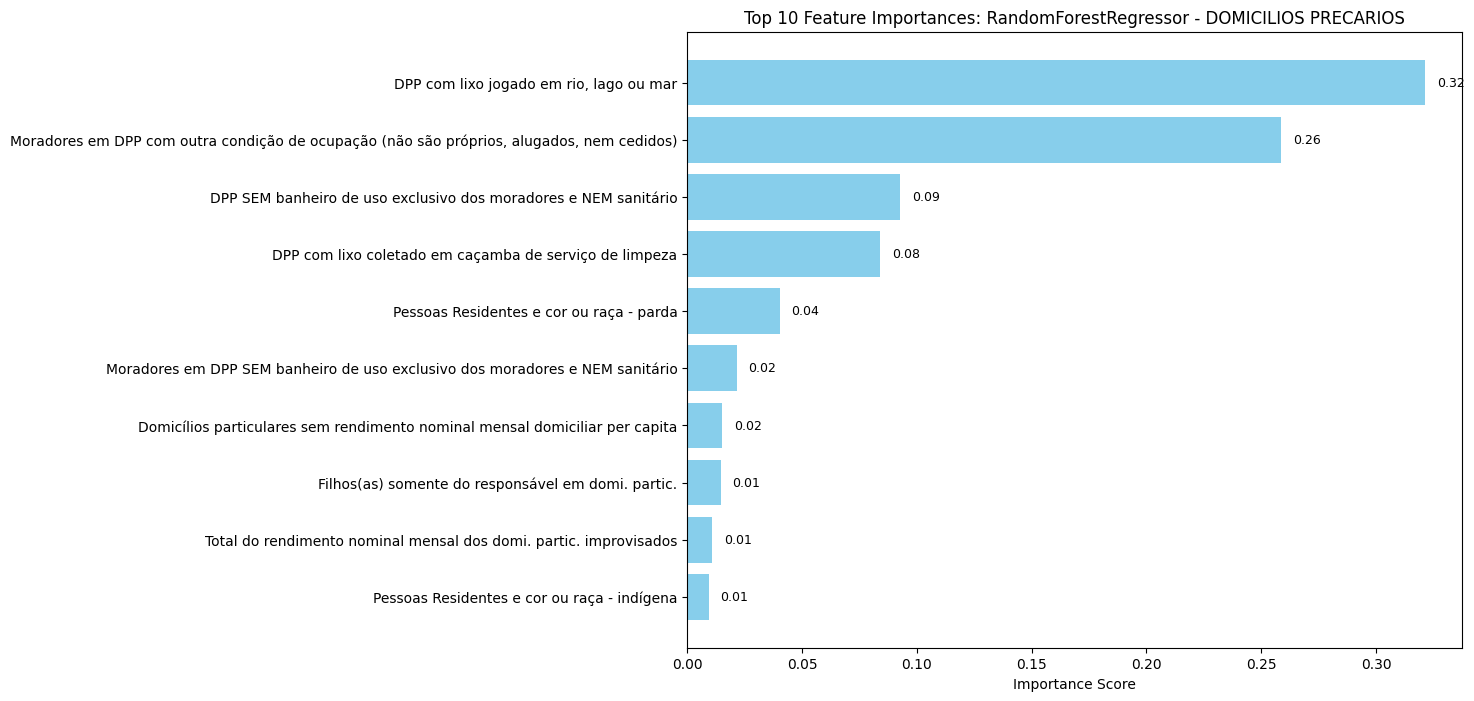

In [68]:
plot_feature_importances(best_rf, X, n_var=10, model_name='RandomForestRegressor', component_name='DOMICILIOS PRECARIOS')

#### Coabitação

In [69]:
coab = execute_nested_cv(X, y['COABITACAO'], RandomForestRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.954, RMSE: 0.021, MAE: 0.016
Estimated R²: 0.914
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 2:

R²: 0.953, RMSE: 0.020, MAE: 0.014
Estimated R²: 0.913
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 14, 'max_features': 'log2', 'min_impurity_decrease': np.float64(0.004379951568515358), 'min_samples_leaf': 6, 'min_samples_split': 16}

Fold 3:

R²: 0.765, RMSE: 0.059, MAE: 0.020
Estimated R²: 0.934
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 4:

R²: 0.912, RMSE: 0.020, MAE: 0.014
Estimated R²: 0.917
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0

In [70]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['COABITACAO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    RandomForestRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 14, 'max_features': 'log2', 'min_impurity_decrease': np.float64(0.004379951568515358), 'min_samples_leaf': 6, 'min_samples_split': 16}


In [71]:
# Refit Model with Best Parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_rf, X_test, y_test)

R-squared: 0.0904
RMSE: 0.0908
MAE: 0.0574


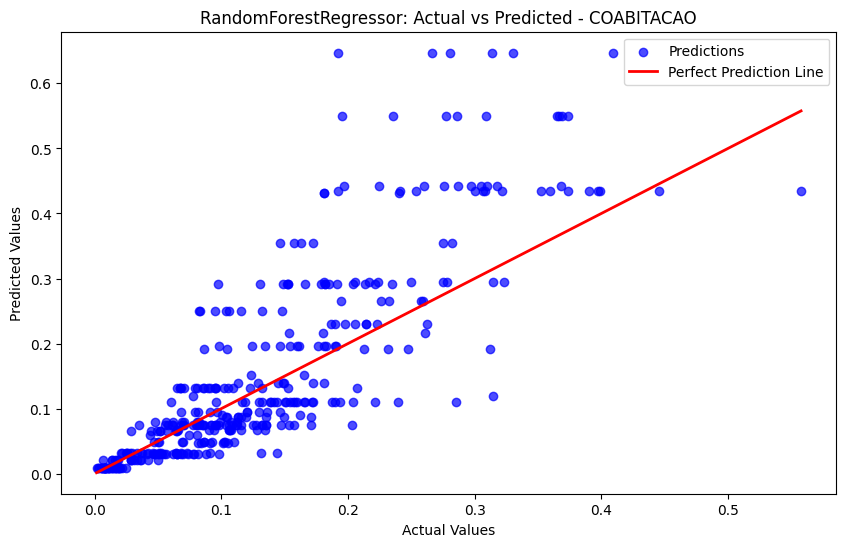

In [72]:
create_test_plot(y_test, y_pred, model_name='RandomForestRegressor', component_name='COABITACAO')

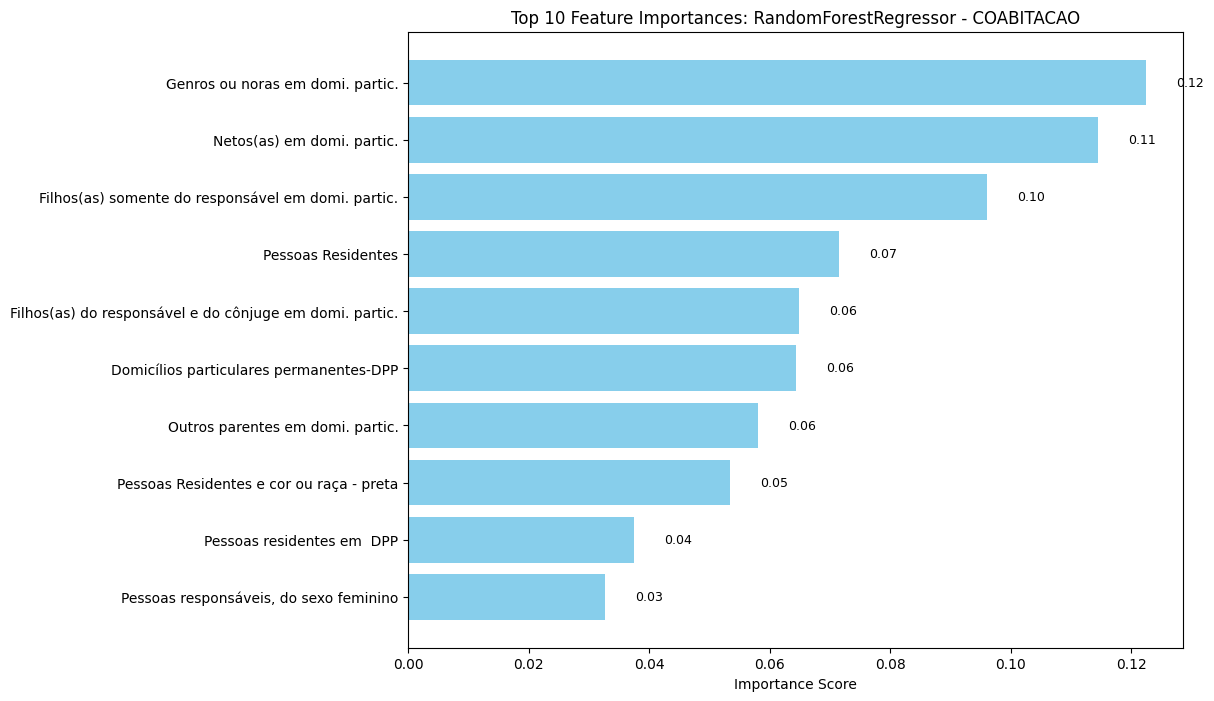

In [73]:
plot_feature_importances(best_rf, X, n_var=10, model_name='RandomForestRegressor', component_name='COABITACAO')

#### Ônus excessivo

In [74]:
onus = execute_nested_cv(X, y['ONUS EXCESSIVO'], RandomForestRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.886, RMSE: 0.047, MAE: 0.033
Estimated R²: 0.851
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 2:

R²: 0.872, RMSE: 0.041, MAE: 0.028
Estimated R²: 0.848
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 3:

R²: 0.823, RMSE: 0.060, MAE: 0.036
Estimated R²: 0.855
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 4:

R²: 0.846, RMSE: 0.042, MAE: 0.027
Estimated R²: 0.859
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.

In [75]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['ONUS EXCESSIVO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    RandomForestRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}


In [76]:
# Refit Model with Best Parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_rf, X_test, y_test)

R-squared: 0.5645
RMSE: 0.0846
MAE: 0.0578


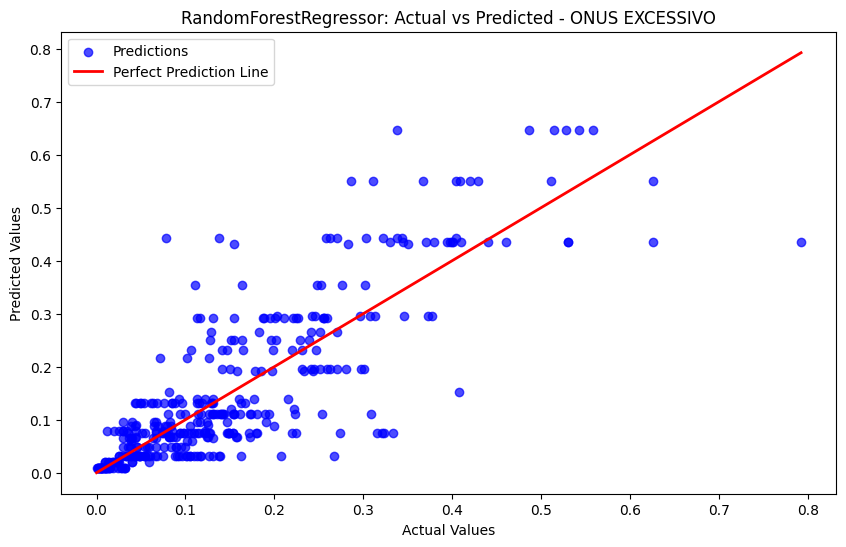

In [77]:
create_test_plot(y_test, y_pred, model_name='RandomForestRegressor', component_name='ONUS EXCESSIVO')

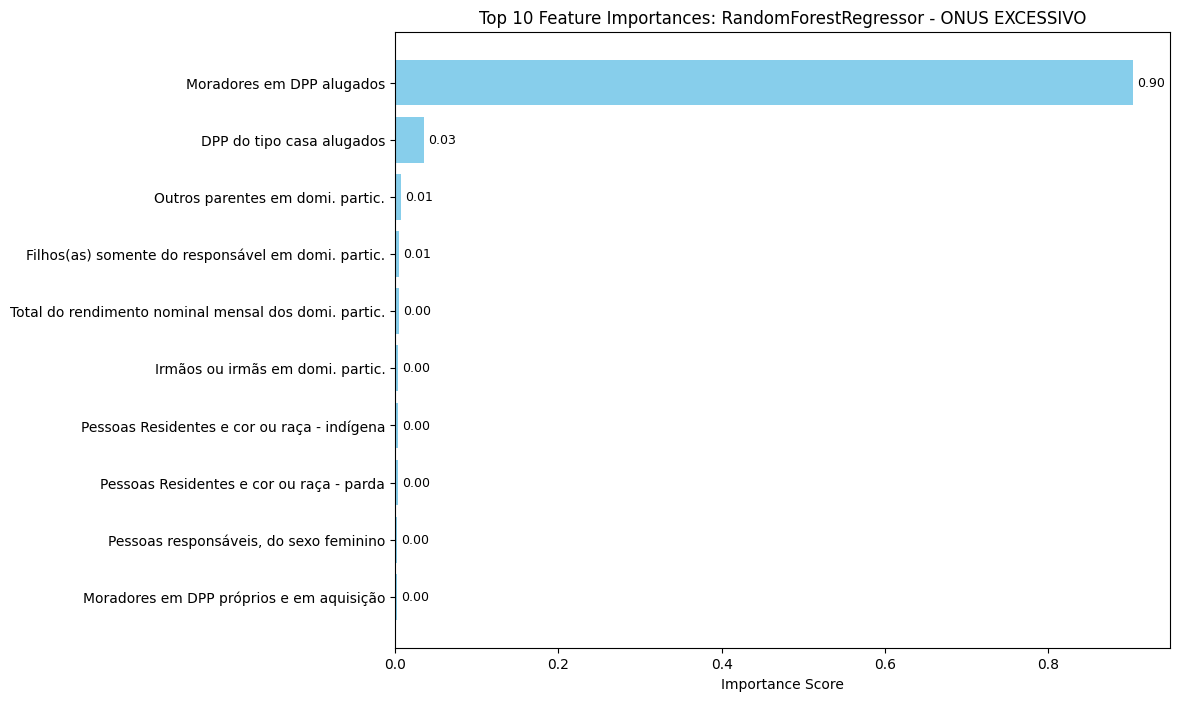

In [78]:
plot_feature_importances(best_rf, X, n_var=10, model_name='RandomForestRegressor', component_name='ONUS EXCESSIVO')

#### Adensamento

In [79]:
adens = execute_nested_cv(X, y['ADENSAMENTO'], RandomForestRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.757, RMSE: 0.094, MAE: 0.060
Estimated R²: 0.760
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 2:

R²: 0.816, RMSE: 0.080, MAE: 0.052
Estimated R²: 0.754
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 3:

R²: 0.772, RMSE: 0.085, MAE: 0.058
Estimated R²: 0.759
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 4:

R²: 0.783, RMSE: 0.072, MAE: 0.049
Estimated R²: 0.769
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.

In [80]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['ADENSAMENTO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    RandomForestRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}


In [81]:
# Refit Model with Best Parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_rf, X_test, y_test)

R-squared: 0.7401
RMSE: 0.0956
MAE: 0.0612


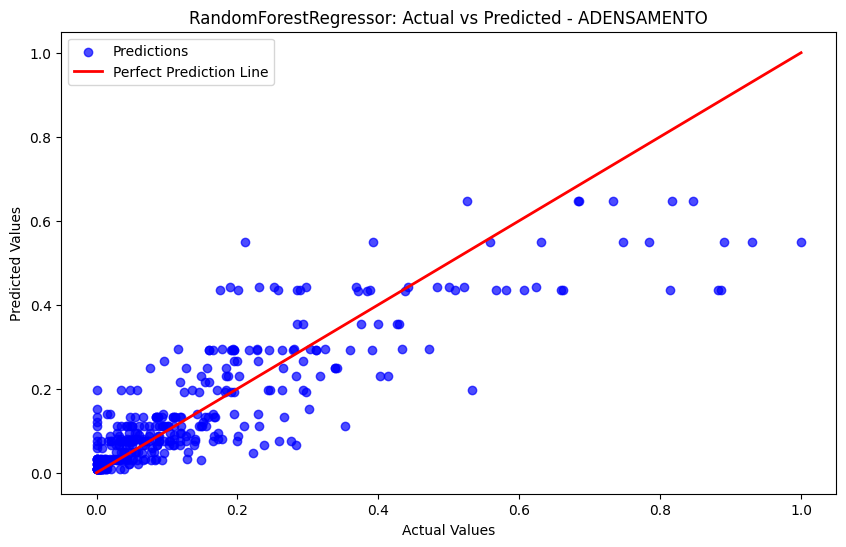

In [82]:
create_test_plot(y_test, y_pred, model_name='RandomForestRegressor', component_name='ADENSAMENTO')

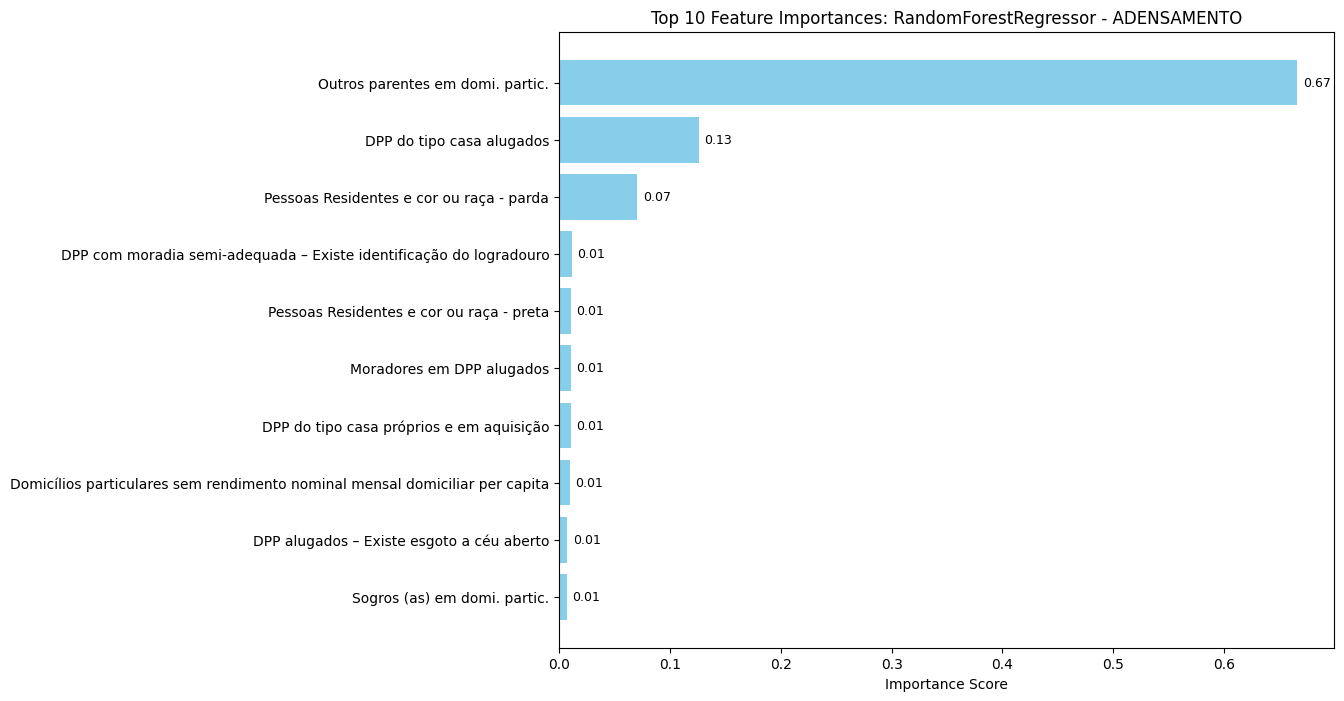

In [83]:
plot_feature_importances(best_rf, X, n_var=10, model_name='RandomForestRegressor', component_name='ADENSAMENTO')

### ExtraTreesRegressor

In [84]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': randint(1, 15),
    'min_samples_split': randint(15, 50),
    'min_samples_leaf': randint(5, 30),
    'min_impurity_decrease': uniform(0.001, 0.010),
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

#### Domicílios precários

In [85]:
domic = execute_nested_cv(X, y['DOMICILIOS PRECARIOS'], ExtraTreesRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.305, RMSE: 0.058, MAE: 0.022
Estimated R²: 0.316
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 2:

R²: 0.369, RMSE: 0.032, MAE: 0.019
Estimated R²: 0.341
params={'bootstrap': False, 'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': np.float64(0.005319450186421158), 'min_samples_leaf': 21, 'min_samples_split': 41}

Fold 3:

R²: 0.393, RMSE: 0.055, MAE: 0.025
Estimated R²: 0.291
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 4:

R²: 0.344, RMSE: 0.034, MAE: 0.019
Estimated R²: 0.341
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.

In [86]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['DOMICILIOS PRECARIOS'], test_size=0.2, random_state=42)

best_params = execute_cv(
    ExtraTreesRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}


In [88]:
# Refit Model with Best Parameters
best_ext = ExtraTreesRegressor(**best_params, random_state=42)
best_ext.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_ext, X_test, y_test)

R-squared: -10.8653
RMSE: 0.1958
MAE: 0.1336


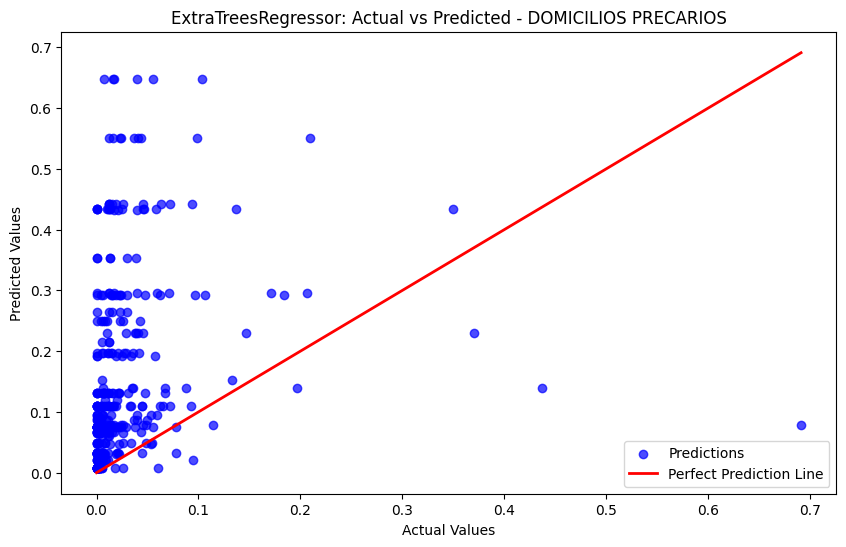

In [89]:
create_test_plot(y_test, y_pred, model_name='ExtraTreesRegressor', component_name='DOMICILIOS PRECARIOS')

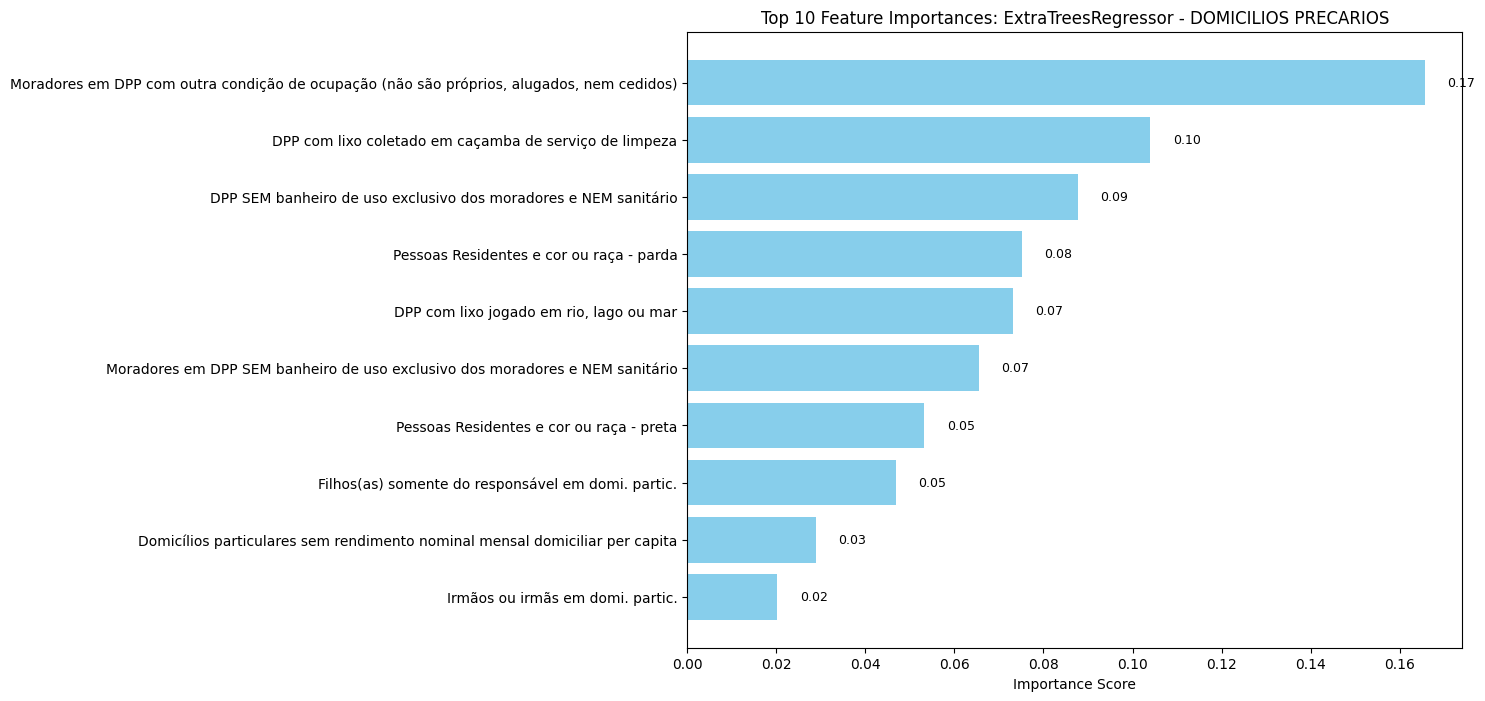

In [90]:
plot_feature_importances(best_ext, X, n_var=10, model_name='ExtraTreesRegressor', component_name='DOMICILIOS PRECARIOS')

#### Coabitação

In [91]:
coab = execute_nested_cv(X, y['COABITACAO'], ExtraTreesRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.948, RMSE: 0.023, MAE: 0.015
Estimated R²: 0.909
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 2:

R²: 0.958, RMSE: 0.019, MAE: 0.013
Estimated R²: 0.909
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 3:

R²: 0.744, RMSE: 0.061, MAE: 0.020
Estimated R²: 0.933
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 4:

R²: 0.921, RMSE: 0.019, MAE: 0.014
Estimated R²: 0.914
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.

In [92]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['COABITACAO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    ExtraTreesRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}


In [93]:
# Refit Model with Best Parameters
best_ext = ExtraTreesRegressor(**best_params, random_state=42)
best_ext.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_ext, X_test, y_test)

R-squared: 0.0904
RMSE: 0.0908
MAE: 0.0574


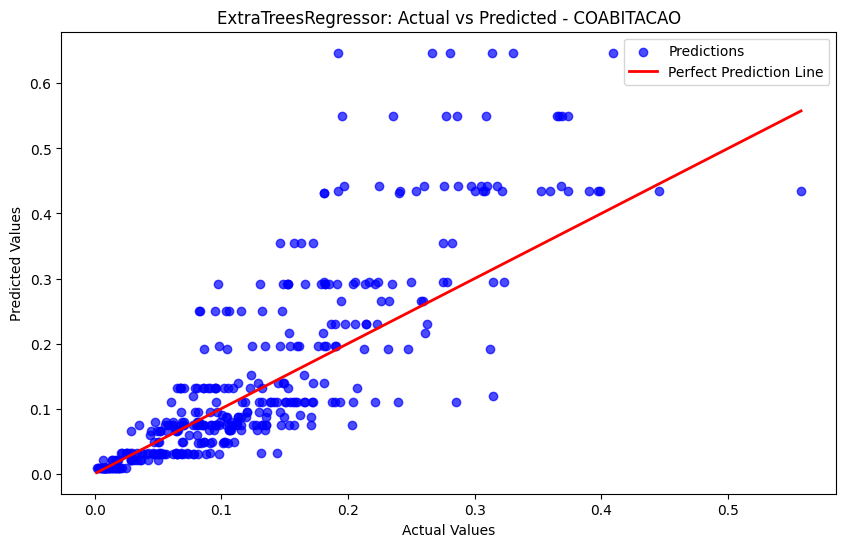

In [94]:
create_test_plot(y_test, y_pred, model_name='ExtraTreesRegressor', component_name='COABITACAO')

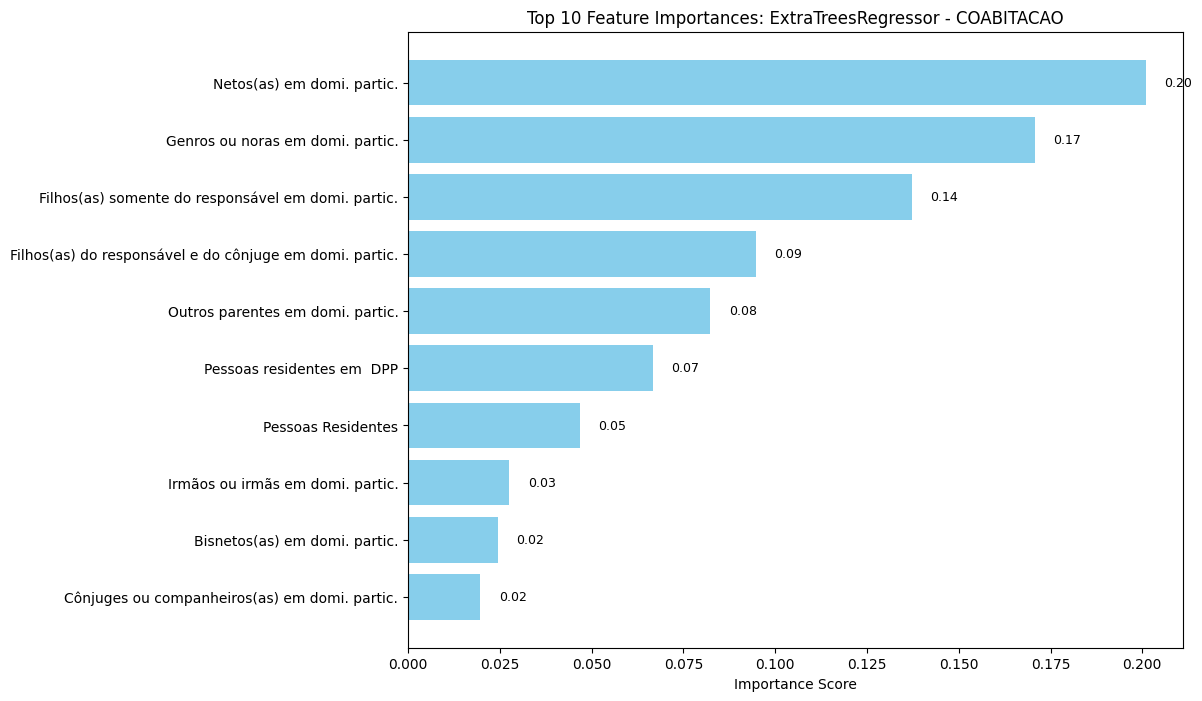

In [95]:
plot_feature_importances(best_ext, X, n_var=10, model_name='ExtraTreesRegressor', component_name='COABITACAO')

#### Ônus excessivo

In [96]:
onus = execute_nested_cv(X, y['ONUS EXCESSIVO'], ExtraTreesRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.881, RMSE: 0.048, MAE: 0.033
Estimated R²: 0.814
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 2:

R²: 0.865, RMSE: 0.042, MAE: 0.029
Estimated R²: 0.818
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 3:

R²: 0.750, RMSE: 0.072, MAE: 0.039
Estimated R²: 0.829
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 4:

R²: 0.849, RMSE: 0.041, MAE: 0.029
Estimated R²: 0.823
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.

In [97]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['ONUS EXCESSIVO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    ExtraTreesRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}


In [98]:
# Refit Model with Best Parameters
best_ext = ExtraTreesRegressor(**best_params, random_state=42)
best_ext.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_ext, X_test, y_test)

R-squared: 0.5645
RMSE: 0.0846
MAE: 0.0578


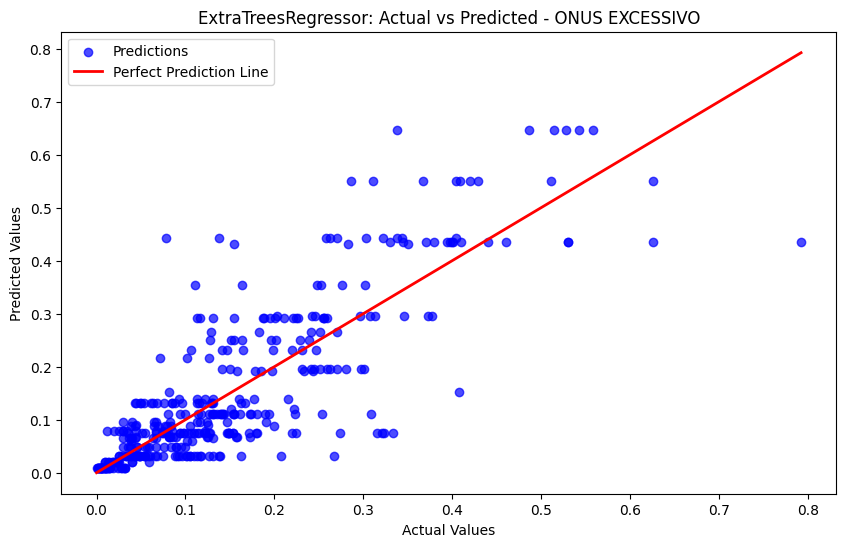

In [99]:
create_test_plot(y_test, y_pred, model_name='ExtraTreesRegressor', component_name='ONUS EXCESSIVO')

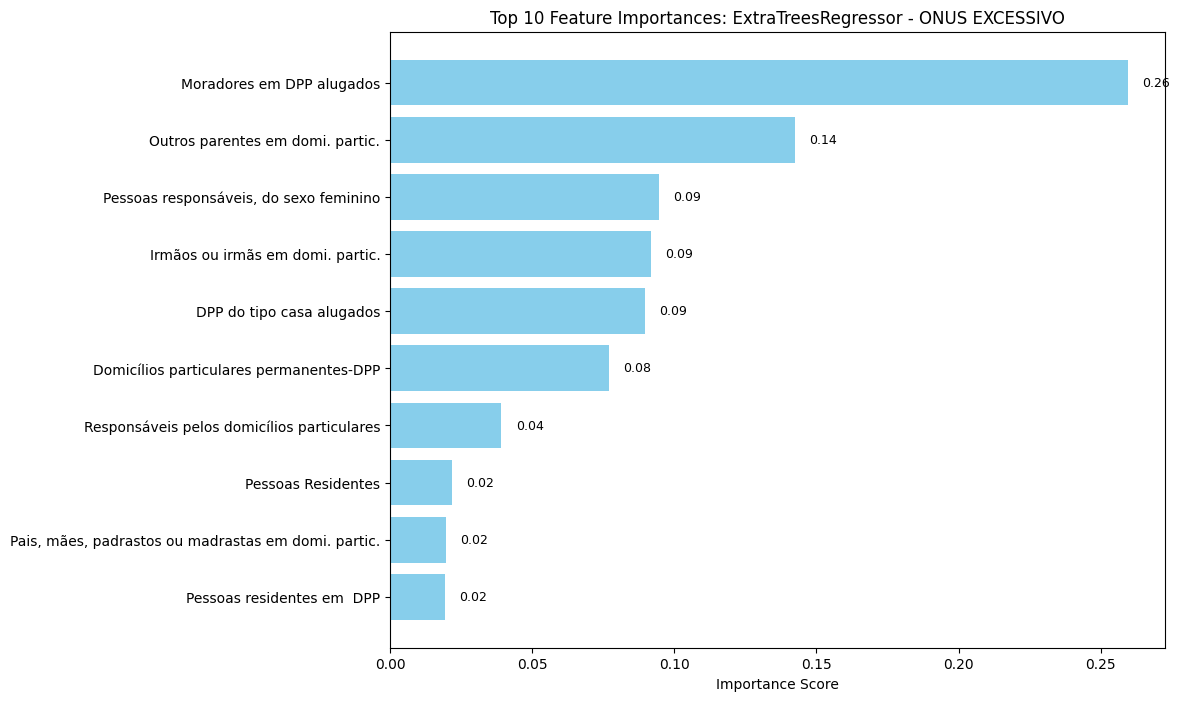

In [100]:
plot_feature_importances(best_ext, X, n_var=10, model_name='ExtraTreesRegressor', component_name='ONUS EXCESSIVO')

#### Adensamento

In [101]:
adens = execute_nested_cv(X, y['ADENSAMENTO'], ExtraTreesRegressor(random_state=42), 10, 10, param_grid, seed=42)

Fold 1:

R²: 0.728, RMSE: 0.099, MAE: 0.063
Estimated R²: 0.739
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 2:

R²: 0.813, RMSE: 0.080, MAE: 0.053
Estimated R²: 0.732
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 3:

R²: 0.752, RMSE: 0.089, MAE: 0.060
Estimated R²: 0.740
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}

Fold 4:

R²: 0.759, RMSE: 0.075, MAE: 0.052
Estimated R²: 0.743
params={'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.

In [102]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y['ADENSAMENTO'], test_size=0.2, random_state=42)

best_params = execute_cv(
    ExtraTreesRegressor(random_state=42),
    X_train_val, y_train_val,
    10, 60, param_grid, scorers, refit='r2', seed=42
)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': None, 'min_impurity_decrease': np.float64(0.0018159418040024035), 'min_samples_leaf': 11, 'min_samples_split': 34}


In [103]:
# Refit Model with Best Parameters
best_ext = ExtraTreesRegressor(**best_params, random_state=42)
best_ext.fit(X_train_val, y_train_val)

y_pred = evaluate_model(best_ext, X_test, y_test)

R-squared: 0.7401
RMSE: 0.0956
MAE: 0.0612


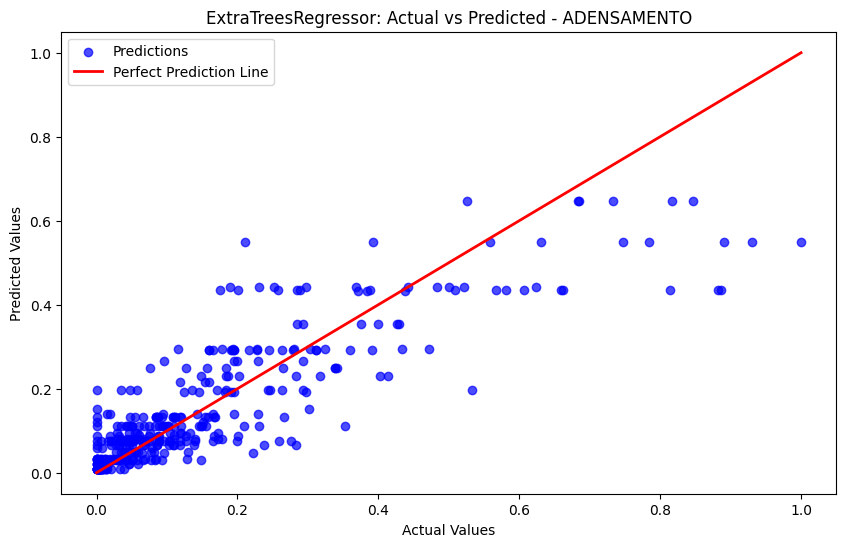

In [104]:
create_test_plot(y_test, y_pred, model_name='ExtraTreesRegressor', component_name='ADENSAMENTO')

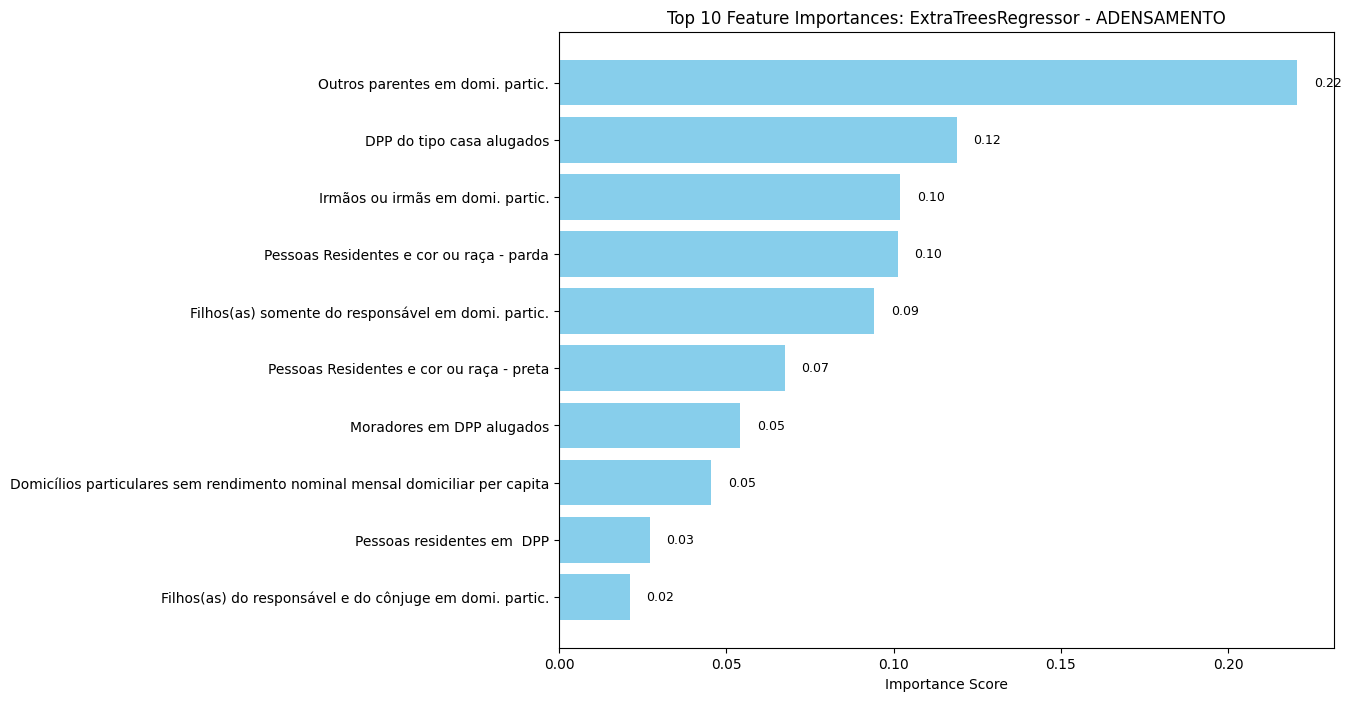

In [105]:
plot_feature_importances(best_ext, X, n_var=10, model_name='ExtraTreesRegressor', component_name='ADENSAMENTO')